![text](https://lh3.googleusercontent.com/gg/AIJ2gl9AFzTaGBwe1Tvd8FmMWrsmKdmPuEZrolZ57iKa-SgNDT_NgB0DUqVLAG0maKp27NUt4zRxUwrcmgJjqMOcjiMuy5WnBGLNjY_jHM9a20vyw_56lGXyWj4KFTUTxVi4Y3BXoeCrK-ohrY99F2U-5L28vFUqoAVOVSXJiCbQdguqoHO5th77=s1024-rj-mp2)

# 🧠 **Stroke Risk Prediction: End-to-End Analysis**

## **1. Project Overview**
This project aims to predict the likelihood of a patient being at risk of a stroke based on various health indicators and clinical symptoms. We utilize a comprehensive dataset including demographic data, vital signs, and specific symptoms (such as chest pain, edema, and anxiety) to train both traditional Machine Learning models and Deep Learning networks.

The workflow moves from raw data cleaning to advanced Feature Selection (RFE & Mutual Information), culminating in a comparative analysis of multiple classification algorithms.

---

## **2. Notebook Workflow**
This notebook is structured into the following key phases:

1.  **📊 Data Exploration (EDA):**
    * Initial data inspection and cleaning (removing duplicates).
    * Visualizing relationships between age, symptoms, and stroke risk.
    * Analyzing symptom frequency distribution among risk groups.
2.  **⚙️ Feature Engineering & Selection:**
    * Encoding categorical variables.
    * **Correlation Analysis:** Identifying multicollinearity.
    * **Feature Selection:** Using *Mutual Information* and *Recursive Feature Elimination (RFE)* to identify the most impactful predictors (removing weak features like nausea and excessive sweating).
3.  **🤖 Model Training (Traditional ML):**
    * **Preprocessing:** Standard Scaling and Train-Test splitting.
    * **Algorithms:** Logistic Regression, SVC, AdaBoost, Random Forest, and Gradient Boosting.
    * **Evaluation:** accuracy, ROC-AUC, and Confusion Matrices.
4.  **🧠 Deep Learning (ANN):**
    * Implementation of a Sequential Neural Network using **TensorFlow/Keras**.
    * Training history visualization (Loss vs. Accuracy).

---

## **3. Tech Stack**
* **Data Manipulation:** `Pandas`, `NumPy`
* **Visualization:** `Matplotlib`, `Seaborn`, `Plotly Express`
* **Machine Learning:** `Scikit-Learn` (RF, SVC, AdaBoost, GradientBoosting, RFE)
* **Deep Learning:** `TensorFlow`, `Keras`

---

<img src="https://lh3.googleusercontent.com/gg/AIJ2gl9aC7gXEIBvKB6mI-JCnzlEz327smfQDOhCLL9IZfgeCQbZ4ZU5l4e5TGXYsFxpx2p6aRJ-BgLECccHOmaV8MqFWUDuvkcztKrCBVRil_3AIC10Oww19LjDI8pkCca9nMWekmcxC6s5XoTEtI997M9_2ogVacWmmE4l7u5i0e7bvYnDIc8=s1024-rj-mp2"
     width="400"
     alt="Image description">

# **1. Import Libraries**
Importing necessary libraries for data manipulation, visualization, and machine learning evaluation.

In [1]:
import numpy as np
import pandas as pd

**Visualization libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Statistics**

In [3]:
from scipy.stats import skew

**Machine Learning - Scikit-learn**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE, mutual_info_classif

**Metrics**

In [5]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

**Deep Learning - TensorFlow / Keras**

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

<img src="https://lh3.googleusercontent.com/gg-dl/ABS2GSlB4OH4MMbBbN5MTleGtF7f3c1EfBLRGI12vK1fPnxcdf-Jr_BG3p2Ua99ieVQiVewIdpWy6S3Z7SyAIMtOQz3kn4yaCaMg4XVv_Lc93dNla5hSaCDX5M8NxhQOFA9ASQmVsvs6g7VzX9STMIDx9dzN2o1VnCRpHOJkQ0GwmaqXsyRfoA=s1024-rj"
     width="400"
     alt="Image description">

# **2. Data Loading and Overview**
Loading the dataset and performing an initial check on the structure, data types, and null values.

In [7]:
import kagglehub
import os

path = kagglehub.dataset_download(
    "mahatiratusher/stroke-risk-prediction-dataset-v2"
)

print(os.listdir(path))

100%|██████████| 240k/240k [00:00<00:00, 586kB/s]

Extracting files...
['stroke_risk_dataset_v2.csv']


In [8]:
data = pd.read_csv(os.path.join(path, "stroke_risk_dataset_v2.csv"))

## **Explore Data**

In [9]:
data.head(5)

age  gender  chest_pain  high_blood_pressure  irregular_heartbeat  \
0   22    Male           1                    0                    0   
1   52    Male           0                    1                    1   
2   63  Female           0                    1                    0   
3   41    Male           0                    0                    1   
4   53    Male           0                    0                    0   

   shortness_of_breath  fatigue_weakness  dizziness  swelling_edema  \
0                    0                 0          0               0   
1                    0                 0          0               0   
2                    0                 0          1               0   
3                    0                 1          0               0   
4                    0                 0          1               1   

   neck_jaw_pain  excessive_sweating  persistent_cough  nausea_vomiting  \
0              0                   0                 1                0   
1              0                   0                 0                0   
2              0                   0                 0                0   
3              0                   0                 0                0   
4              0                   0                 0                1   

   chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  \
0                 0                0                    0             0   
1                 0                1                    1             0   
2                 0                0                    0             0   
3                 0                0                    0             0   
4                 0                1                    0             0   

   stroke_risk_percentage  at_risk  
0                    33.3        0  
1                   100.0        1  
2                   100.0        1  
3                    44.5        0  
4                    84.8        1

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

check nulls

In [11]:
data.isnull().sum()

age                       0
gender                    0
chest_pain                0
high_blood_pressure       0
irregular_heartbeat       0
shortness_of_breath       0
fatigue_weakness          0
dizziness                 0
swelling_edema            0
neck_jaw_pain             0
excessive_sweating        0
persistent_cough          0
nausea_vomiting           0
chest_discomfort          0
cold_hands_feet           0
snoring_sleep_apnea       0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64

check for duplicated

In [12]:
data.shape

(35000, 19)

In [13]:
data.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom',
       'stroke_risk_percentage', 'at_risk'],
      dtype='object')

In [14]:
data.duplicated().sum()

np.int64(16279)

## **Data Cleaning**
Removing duplicate records

In [15]:
data.drop_duplicates(inplace=True)

<img src="https://lh3.googleusercontent.com/gg-dl/ABS2GSltIBmlXWMdOnUPKYdZaC5P7vL3DYuiGd4LtfL5FjjDvcV9IiV6FI0DpOgJmTJwAoQGPDPaqJirx3o81sF21iJ0v0WMUSCXTcmkvtqhfDOvi3as3ohFMLzTaRY8EpdB0TSXU95X6ue7MwhCfrgpMtoxu11YDqWO22ZDi5t5MsE_ywiJtQ=s1024-rj"
     width="400"
     alt="Image description">

# **3. Exploratory Data Analysis (EDA)**
## **Risk Factors Visualization**
Visualizing the relationship between specific features (like Age and Chest Pain) and Stroke Risk Percentage, distinguishing between 'At Risk' and 'Not at Risk' groups.

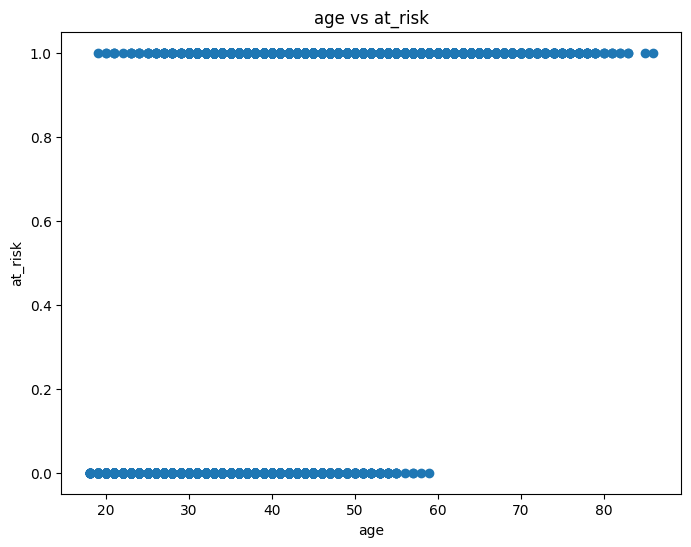

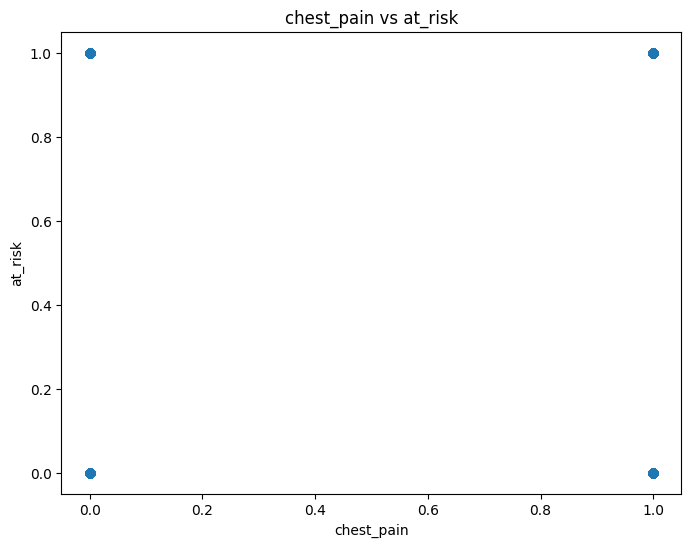

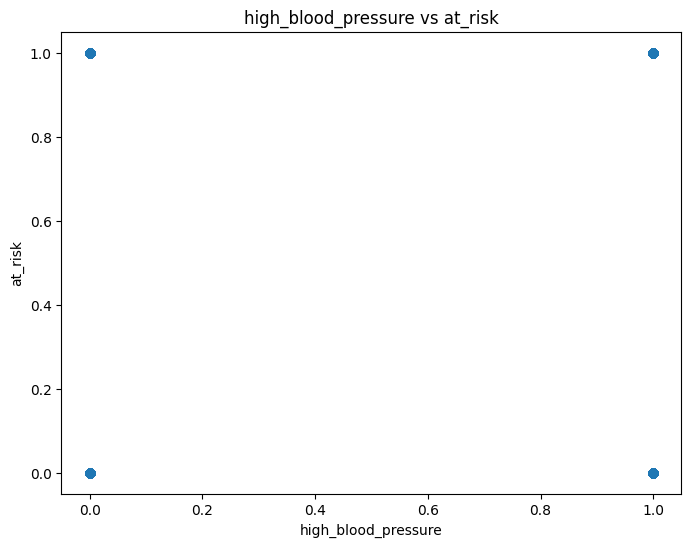

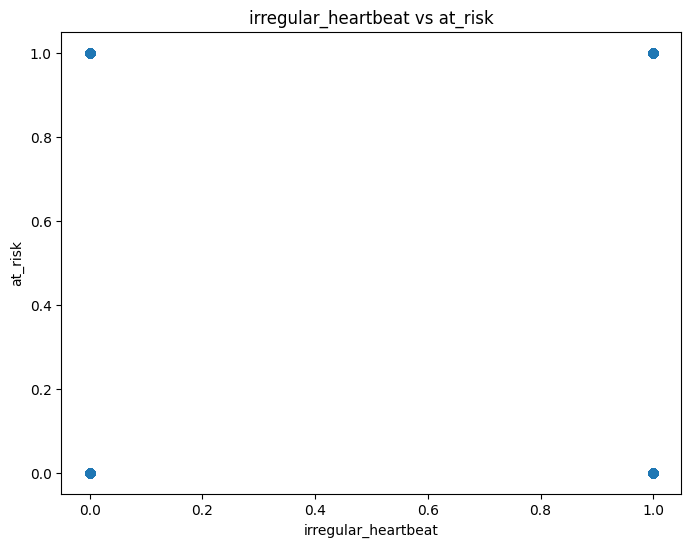

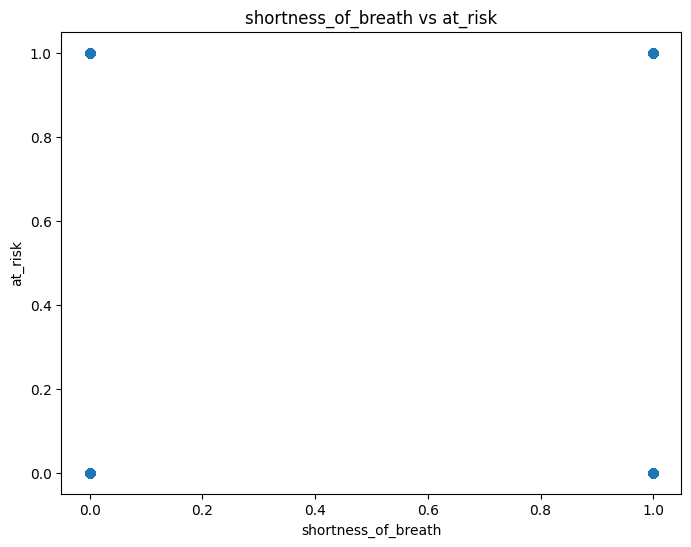

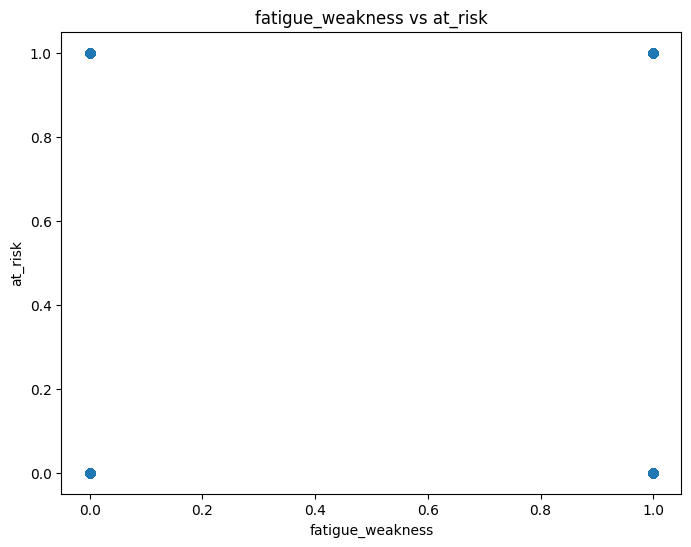

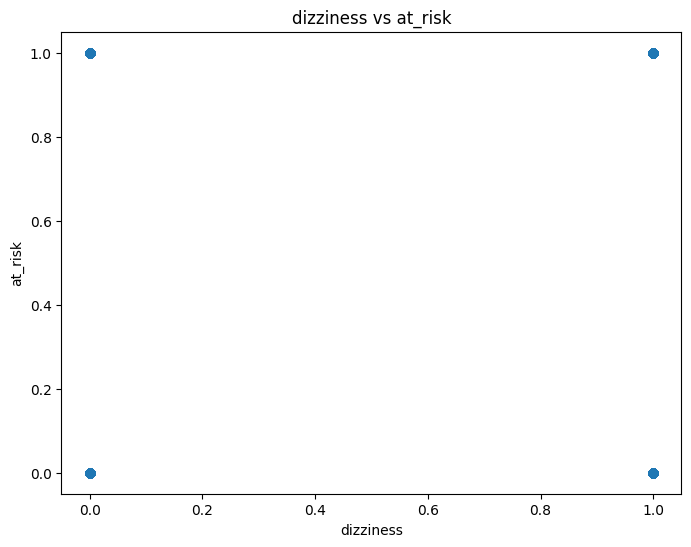

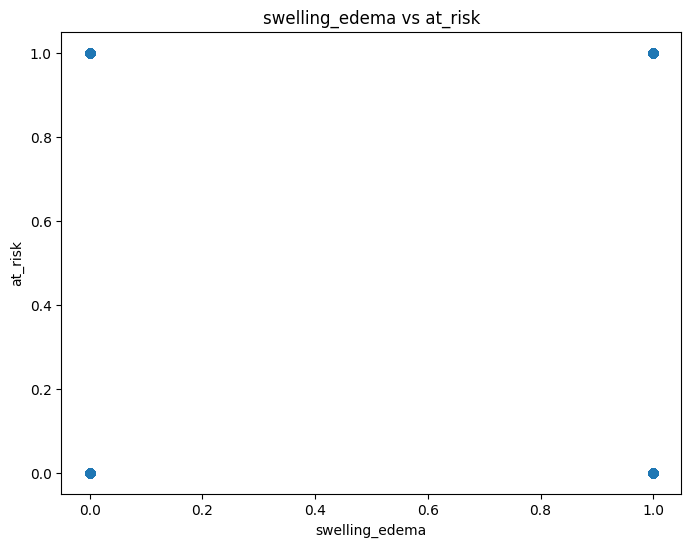

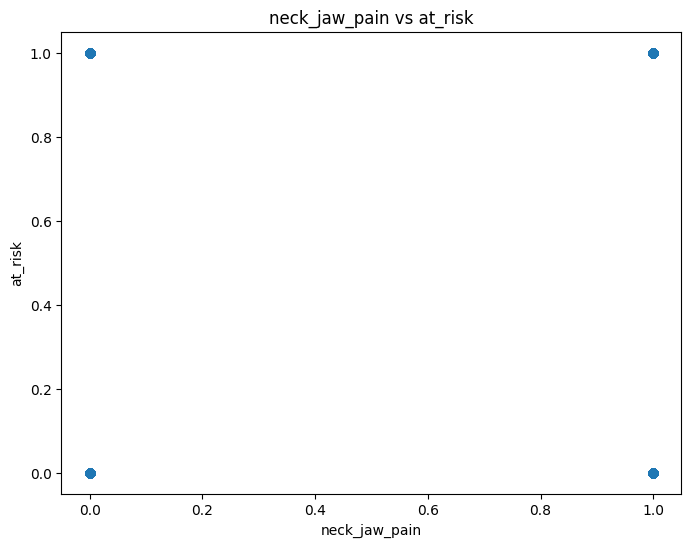

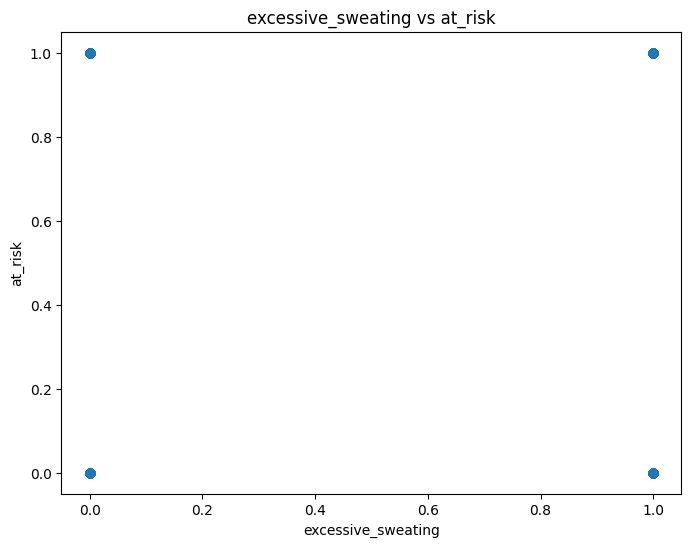

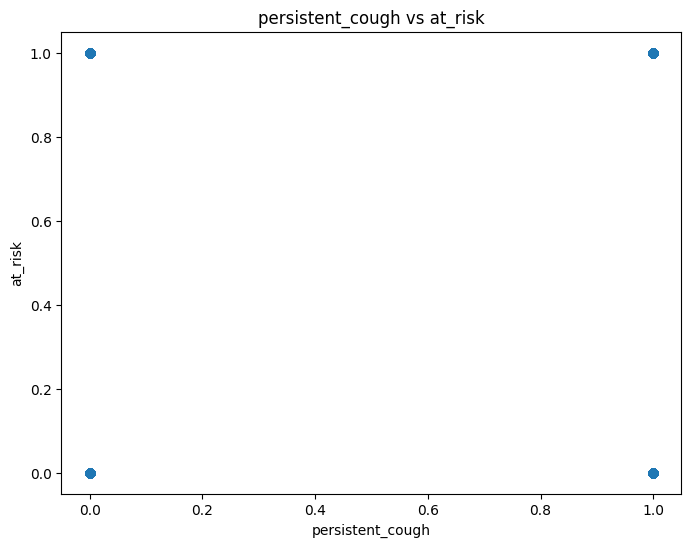

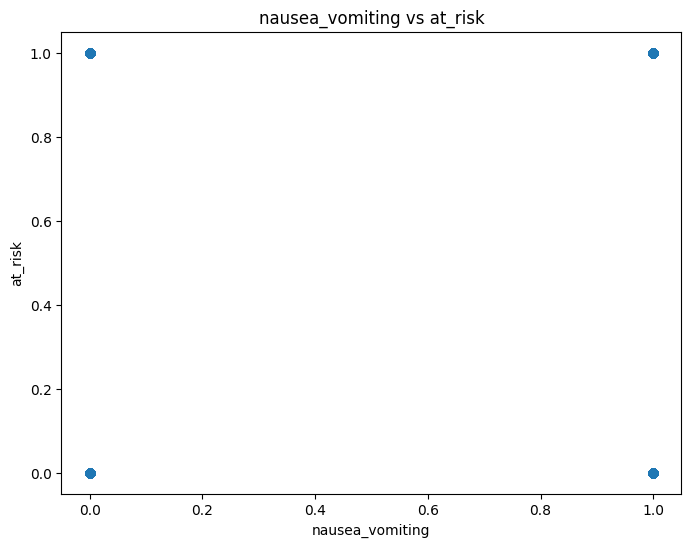

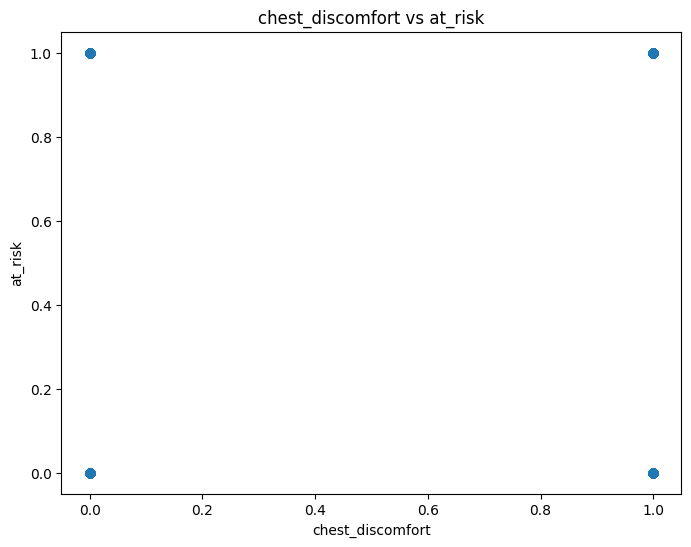

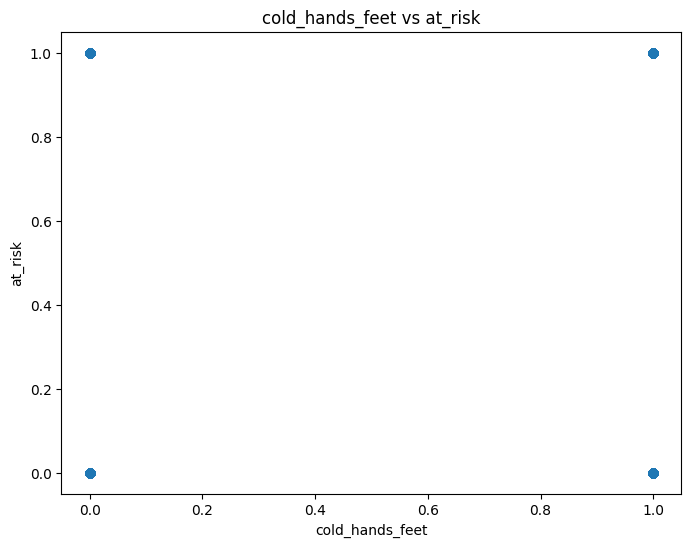

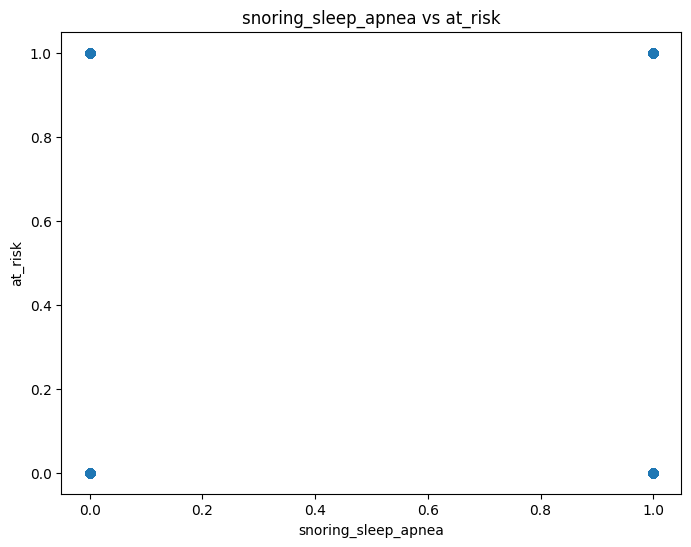

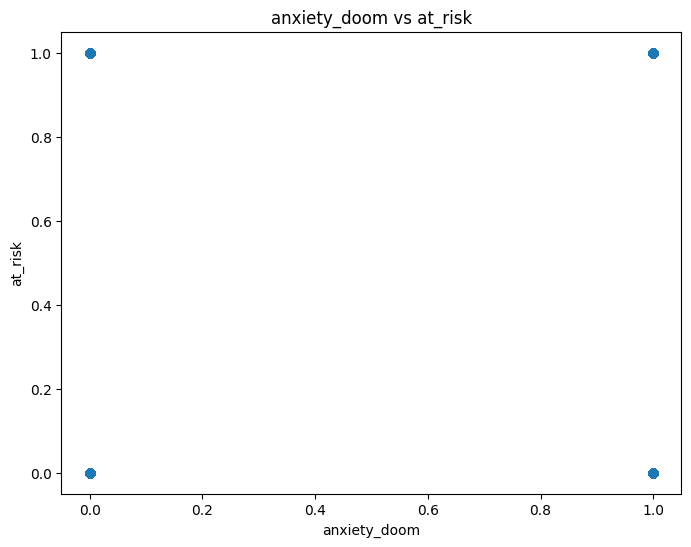

In [16]:
# All feature columns except 'at_risk'
feature_columns = ['age', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom']

for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['at_risk'])
    plt.xlabel(feature)
    plt.ylabel('at_risk')
    plt.title(f'{feature} vs at_risk')
    plt.show()

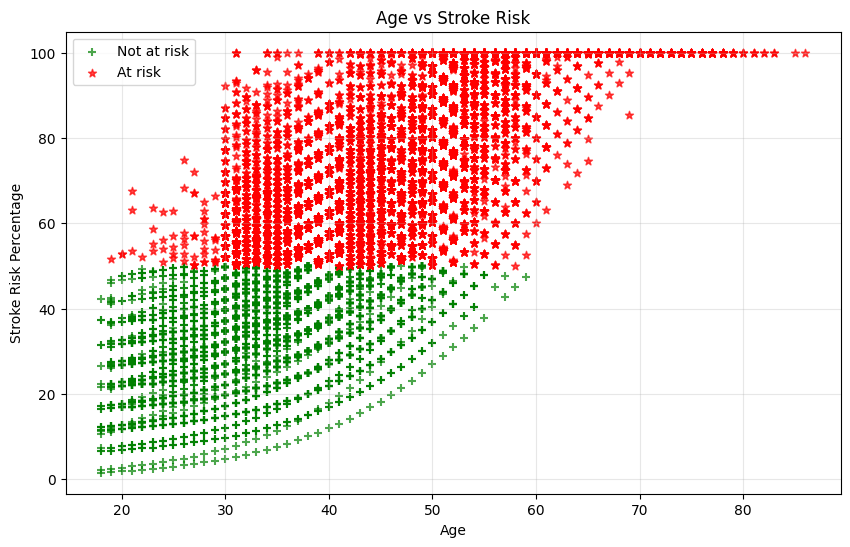

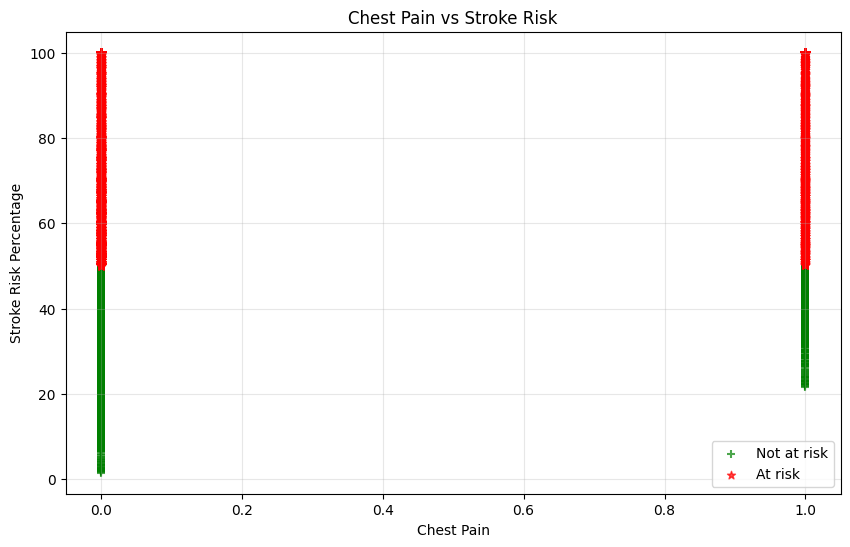

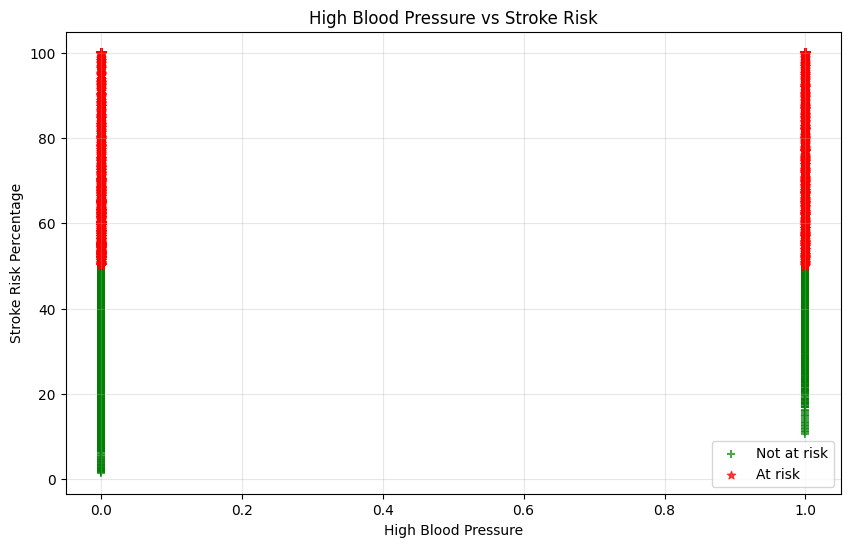

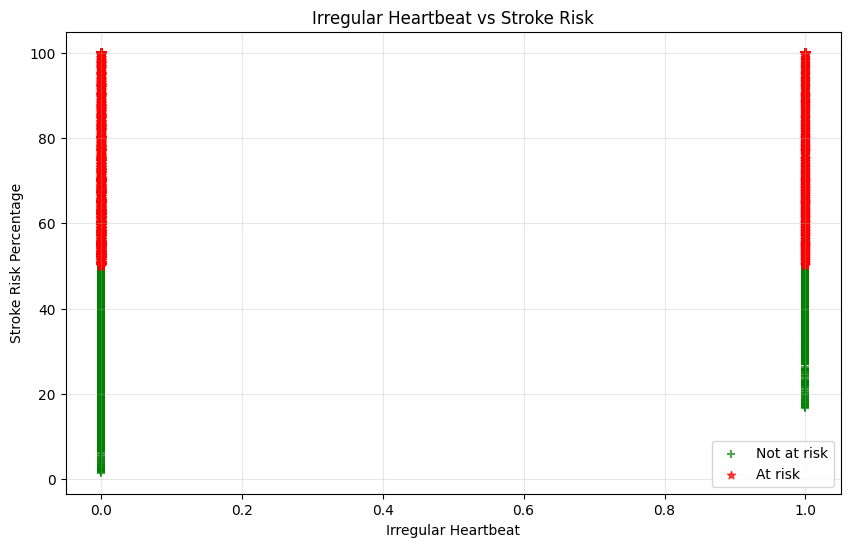

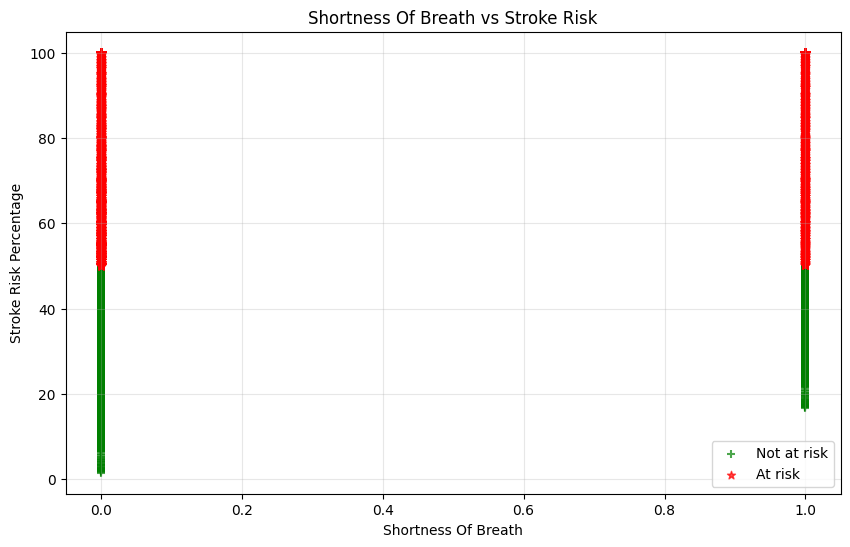

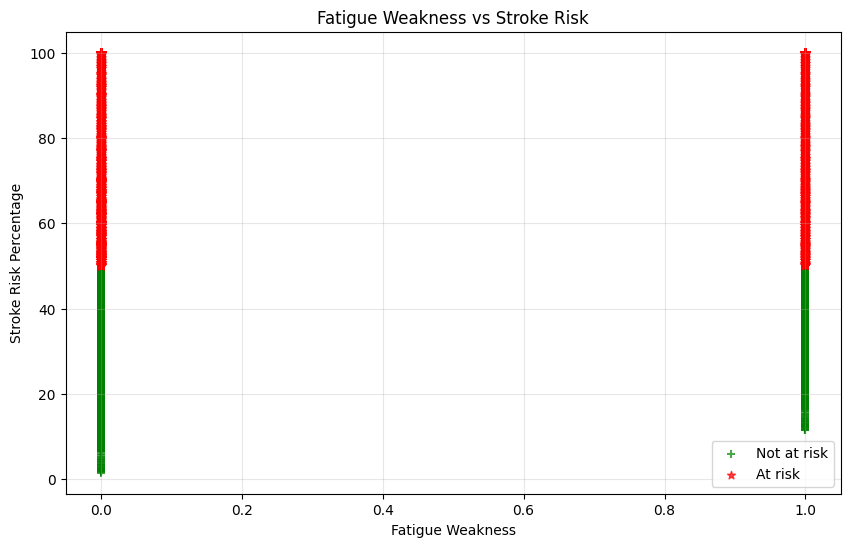

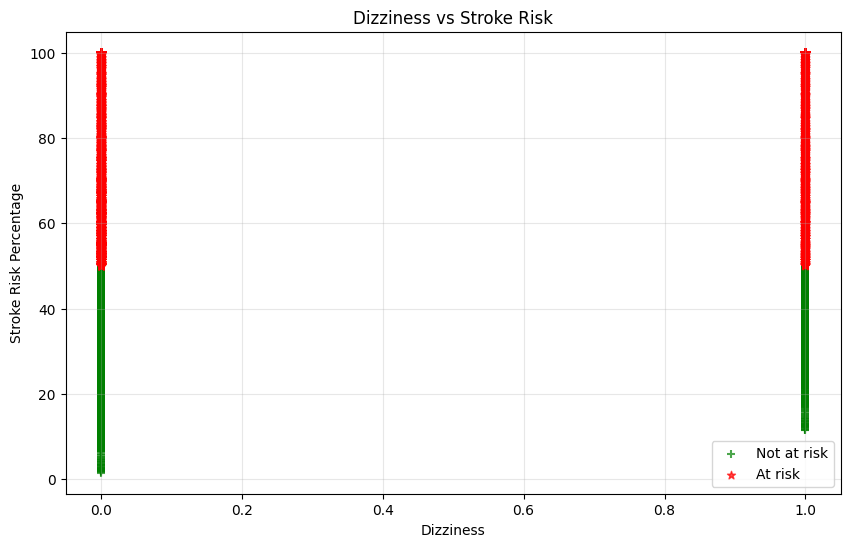

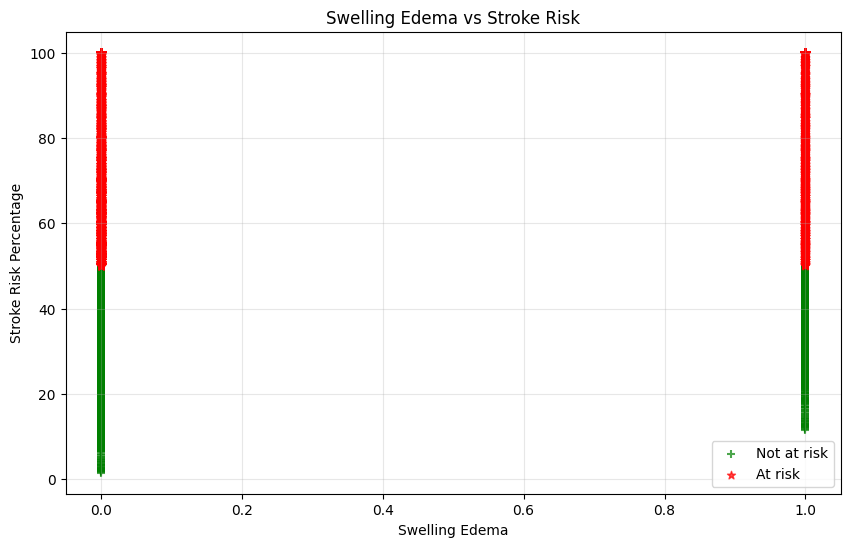

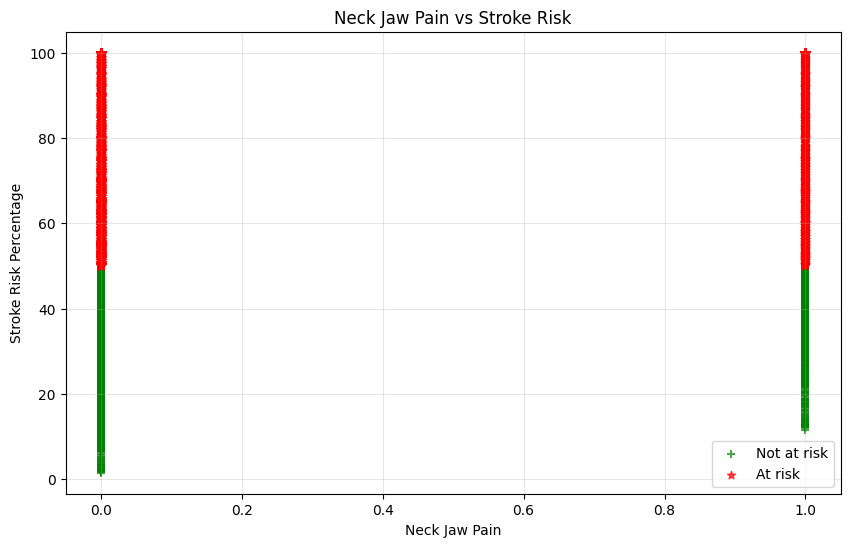

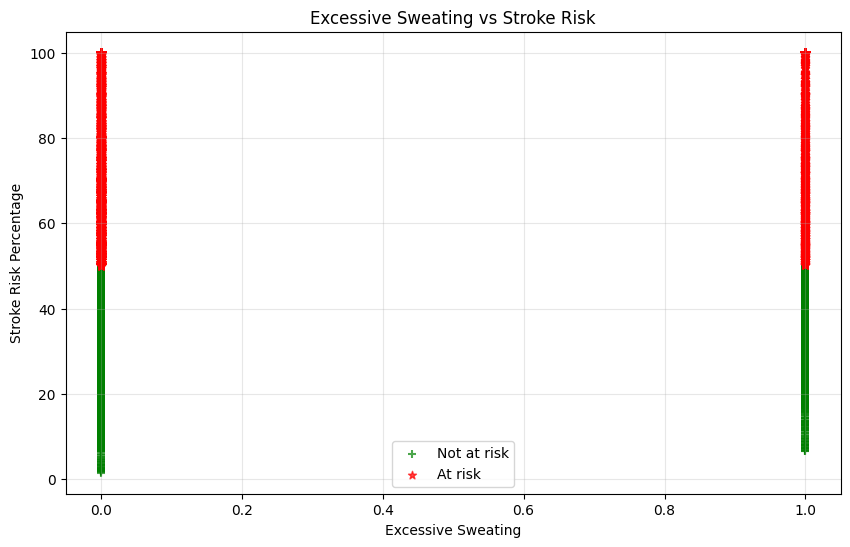

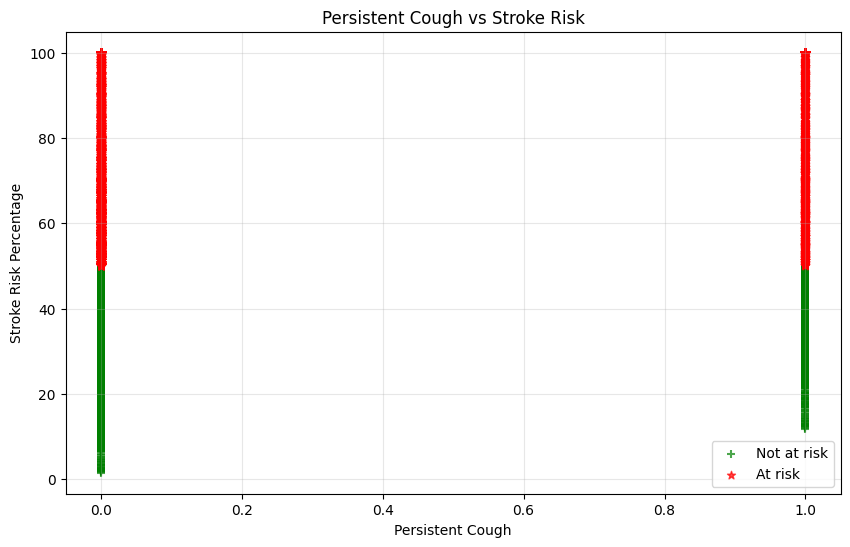

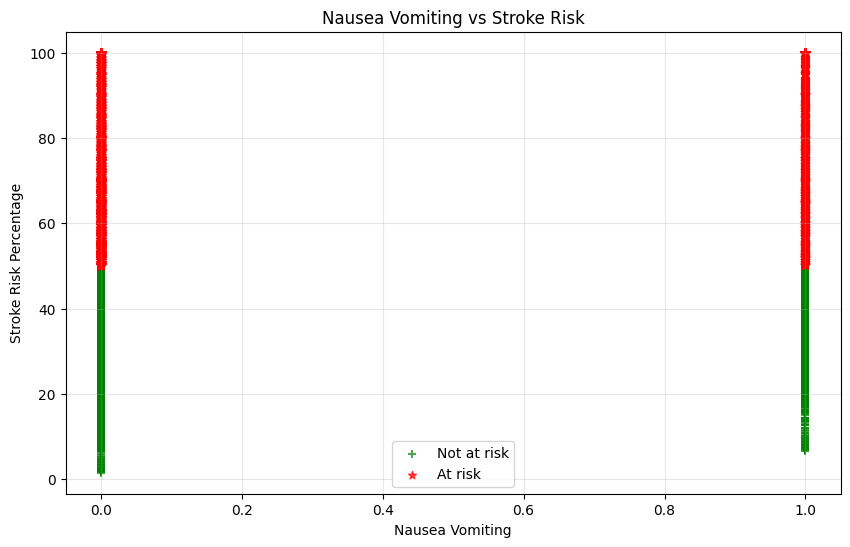

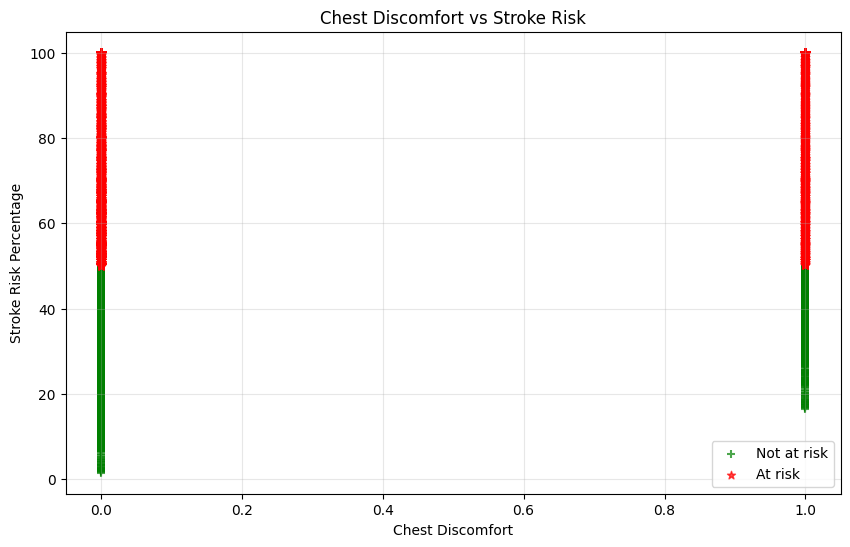

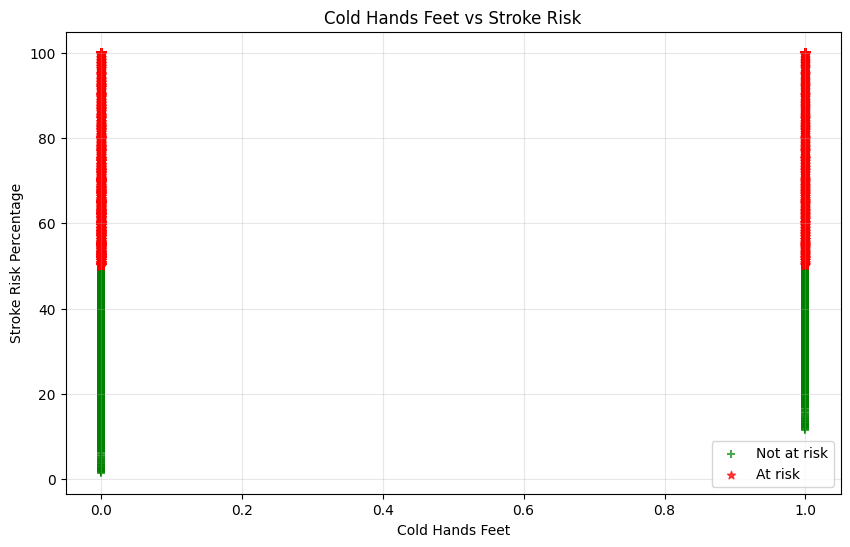

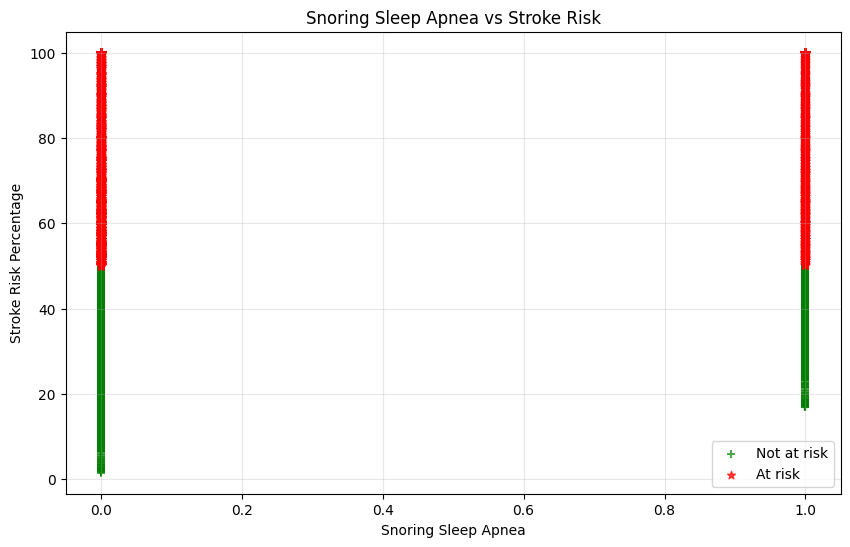

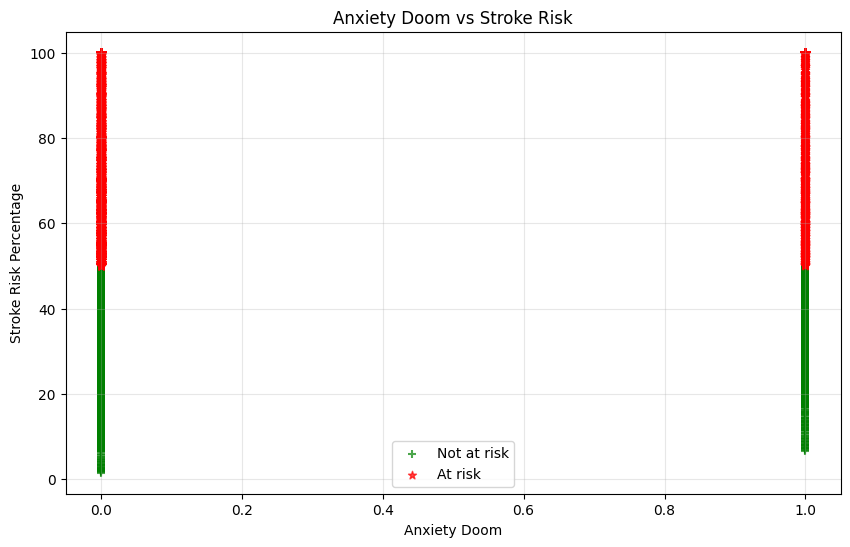

In [17]:
import matplotlib.pyplot as plt

data_risk_0 = data[data['at_risk'] == 0]
data_risk_1 = data[data['at_risk'] == 1]

features = ['age', 'chest_pain', 'high_blood_pressure',
            'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
            'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
            'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
            'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom']

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_risk_0[feature], data_risk_0['stroke_risk_percentage'],
                color="green", marker='+', label='Not at risk', alpha=0.7)
    plt.scatter(data_risk_1[feature], data_risk_1['stroke_risk_percentage'],
                color="red", marker='*', label='At risk', alpha=0.7)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Stroke Risk Percentage')
    plt.legend()
    plt.title(f'{feature.replace("_", " ").title()} vs Stroke Risk')
    plt.grid(True, alpha=0.3)
    plt.show()

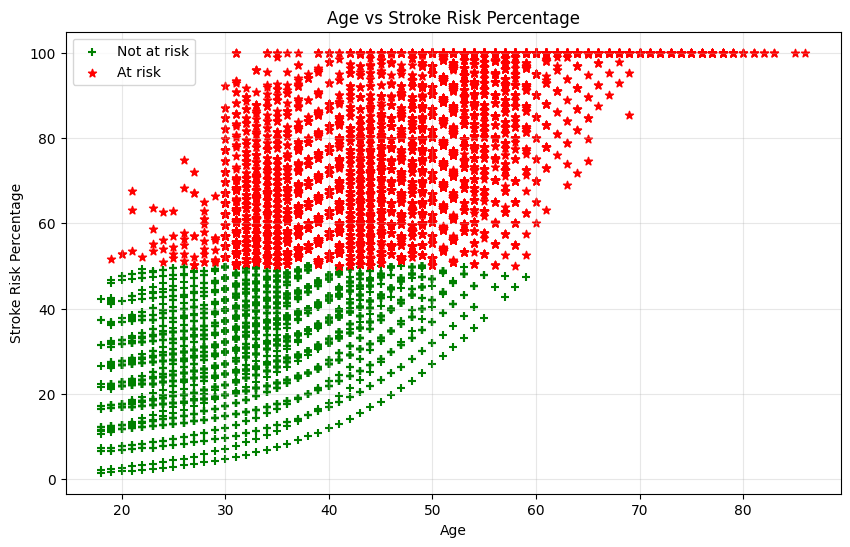

In [18]:
data_risk_0 = data[data['at_risk'] == 0]
data_risk_1 = data[data['at_risk'] == 1]

plt.figure(figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Stroke Risk Percentage')
plt.scatter(data_risk_0['age'], data_risk_0['stroke_risk_percentage'],
            color="green", marker='+', label='Not at risk')
plt.scatter(data_risk_1['age'], data_risk_1['stroke_risk_percentage'],
            color="red", marker='*', label='At risk')
plt.legend()
plt.title('Age vs Stroke Risk Percentage')
plt.grid(True, alpha=0.3)
plt.show()

## **Statistical Distributions**
Using pairplots and descriptive statistics to understand the spread and skewness of the data.

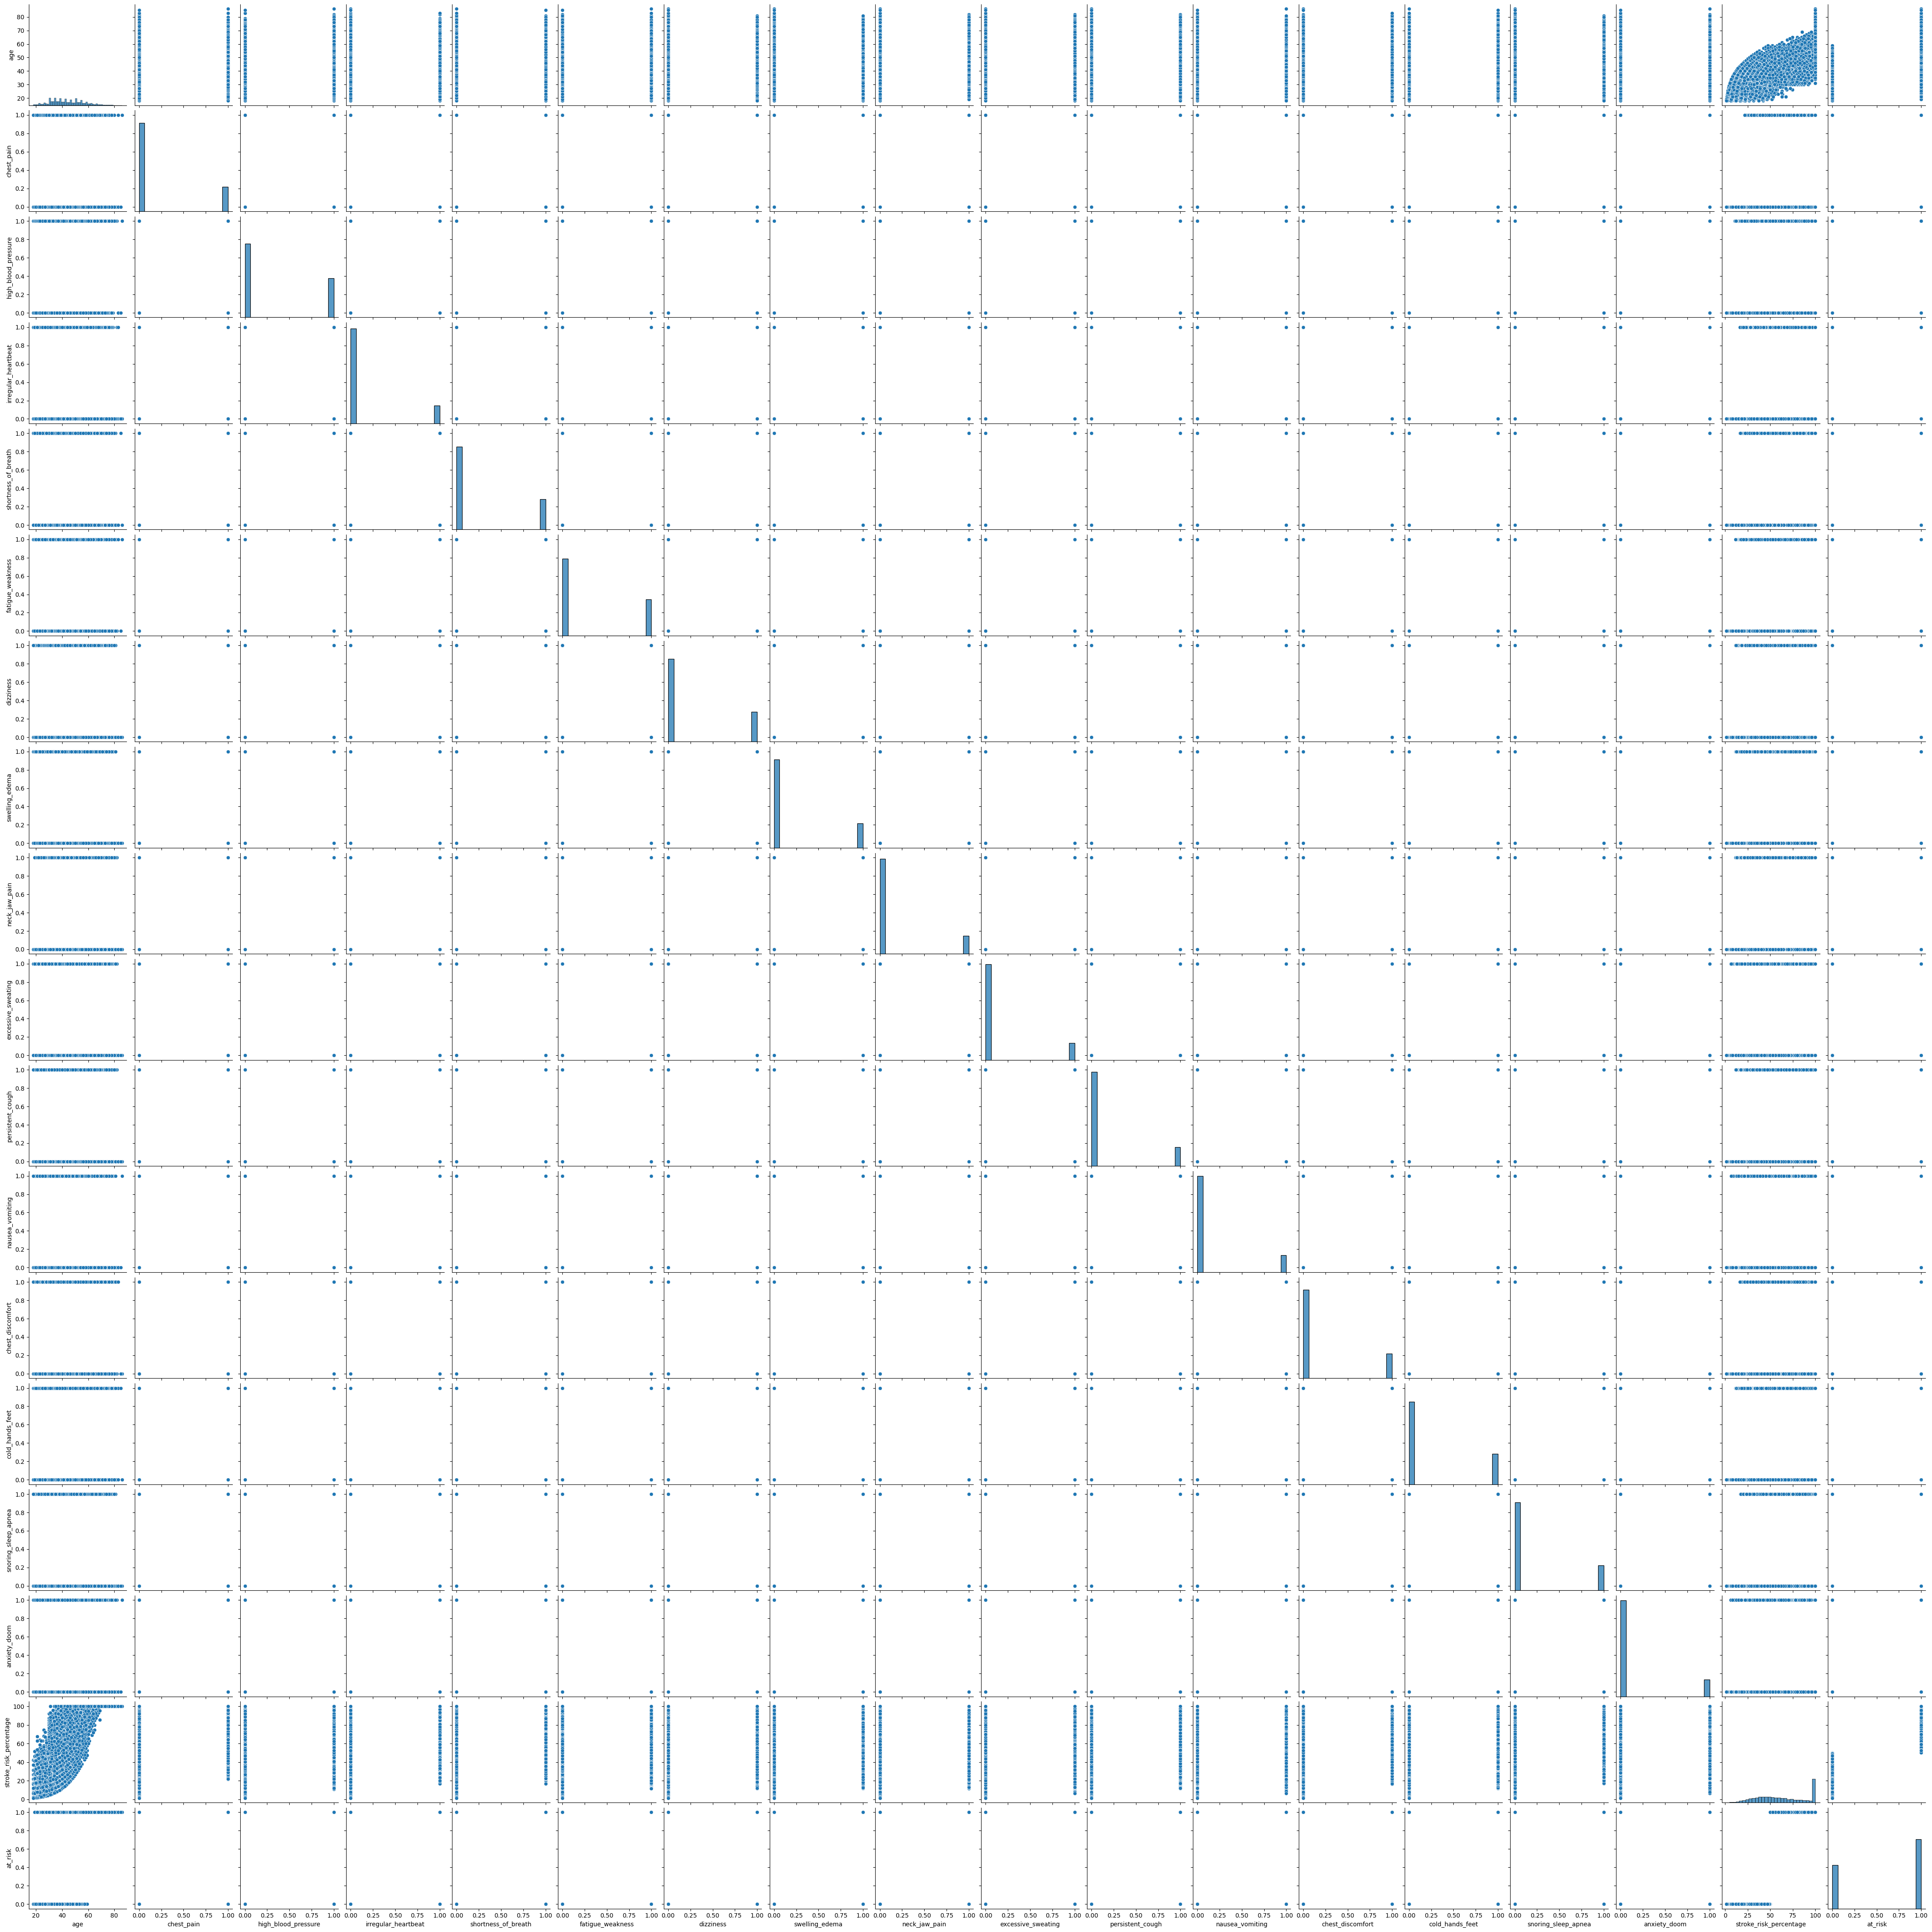

In [19]:
sns.pairplot(data)

In [20]:
columns_to_exclude = ['stroke_risk_percentage', 'age']
for column in data.columns:
    if column not in columns_to_exclude:
        print(f"Unique values for column '{column}': {data[column].unique()}")

Unique values for column 'gender': ['Male' 'Female']
Unique values for column 'chest_pain': [1 0]
Unique values for column 'high_blood_pressure': [0 1]
Unique values for column 'irregular_heartbeat': [0 1]
Unique values for column 'shortness_of_breath': [0 1]
Unique values for column 'fatigue_weakness': [0 1]
Unique values for column 'dizziness': [0 1]
Unique values for column 'swelling_edema': [0 1]
Unique values for column 'neck_jaw_pain': [0 1]
Unique values for column 'excessive_sweating': [0 1]
Unique values for column 'persistent_cough': [1 0]
Unique values for column 'nausea_vomiting': [0 1]
Unique values for column 'chest_discomfort': [0 1]
Unique values for column 'cold_hands_feet': [0 1]
Unique values for column 'snoring_sleep_apnea': [0 1]
Unique values for column 'anxiety_doom': [0 1]
Unique values for column 'at_risk': [0 1]


In [21]:
data[["age","stroke_risk_percentage"]].describe()

age  stroke_risk_percentage
count  18721.000000            18721.000000
mean      43.205438               62.298029
std       11.894173               26.616096
min       18.000000                1.500000
25%       34.000000               40.400000
50%       42.000000               59.100000
75%       52.000000               88.400000
max       86.000000              100.000000

In [22]:
data["at_risk"].value_counts()

at_risk
1    11524
0     7197
Name: count, dtype: int64

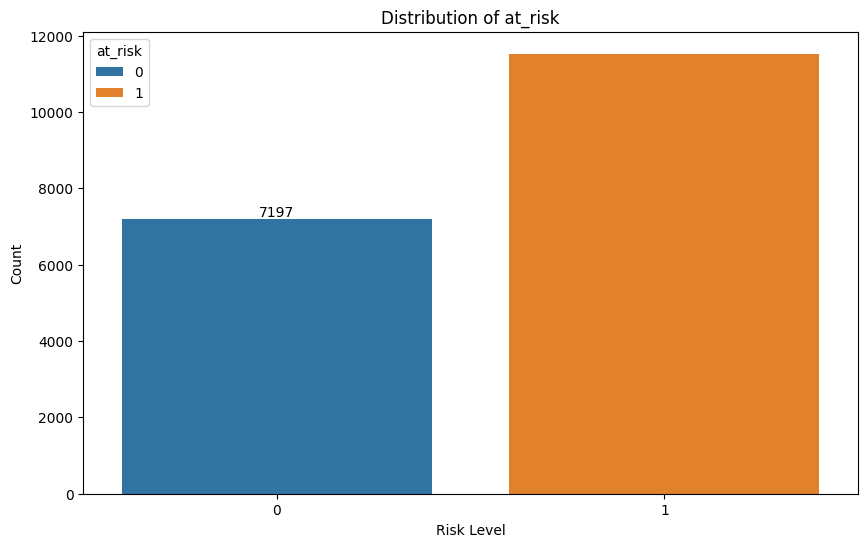

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='at_risk', hue='at_risk')
ax.bar_label(ax.containers[0])
plt.title('Distribution of at_risk')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

## **Symptom Frequency Analysis**
Analyzing how the number of active symptoms correlates with risk levels. We categorize patients into groups based on how many symptoms they exhibit (Less than 3, Exactly 3, More than 3).

In [24]:
# Filter data
filtered_no = data[(data['stroke_risk_percentage'] <= 50) & (data['at_risk'] == 0)]
features = ['chest_pain', 'high_blood_pressure', 'irregular_heartbeat',
            'shortness_of_breath', 'fatigue_weakness', 'dizziness',
            'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
            'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
            'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom']

# Calculate number of features = 1 for each row
feature_counts = filtered_no[features].sum(axis=1)

# Count patients based on feature count conditions
less_than_3 = (feature_counts < 3).sum()
equal_to_3 = (feature_counts == 3).sum()
more_than_3 = (feature_counts > 3).sum()
total_patients = len(filtered_no)

# Results
print("Patients count by number of features = 1 and risk=0:")
print(f"Less than 3 features = 1: {less_than_3} patients ({less_than_3/total_patients*100:.1f}%)")
print(f"Exactly 3 features = 1: {equal_to_3} patients ({equal_to_3/total_patients*100:.1f}%)")
print(f"More than 3 features = 1: {more_than_3} patients ({more_than_3/total_patients*100:.1f}%)")
print(f"Total patients: {total_patients}")


Patients count by number of features = 1 and risk=0:
Less than 3 features = 1: 4480 patients (62.2%)
Exactly 3 features = 1: 2360 patients (32.8%)
More than 3 features = 1: 357 patients (5.0%)
Total patients: 7197


In [25]:
# Data for visualization
categories = ['< 3 features', '= 3 features', '> 3 features']
counts = [less_than_3, equal_to_3, more_than_3]
percentages = [62.2, 32.8, 5.0]  # From your output

fig = px.bar(x=categories,
             y=percentages,
             text=[f'{p}%' for p in percentages],
             title='Patients with Risk=0 and Stroke Risk <= 50%<br>Distribution by Number of Symptoms',
             labels={'x': 'Number of Symptoms = 1', 'y': 'Percentage of Patients (%)'},
             color=categories,
             color_discrete_sequence=['green', 'orange', 'red'])

#fig.update_traces(textposition='outside')
#fig.update_layout(showlegend=False,
                #  yaxis_range=[0, 70])  # Adjust y-axis for better visualization
fig.show()

In [26]:
# Filter data
filtered_yes = data[(data['stroke_risk_percentage'] >= 50) & (data['at_risk'] == 1)]

# Calculate number of features = 1 for each row
feature_counts = filtered_yes[features].sum(axis=1)

# Count patients based on feature count conditions
less_than_3 = (feature_counts < 3).sum()
equal_to_3 = (feature_counts == 3).sum()
more_than_3 = (feature_counts > 3).sum()
total_patients = len(filtered_yes)

# Results
print("Patients count by number of features = 1 and risk = 1:")
print(f"Less than 3 features = 1: {less_than_3} patients ({less_than_3/total_patients*100:.1f}%)")
print(f"Exactly 3 features = 1: {equal_to_3} patients ({equal_to_3/total_patients*100:.1f}%)")
print(f"More than 3 features = 1: {more_than_3} patients ({more_than_3/total_patients*100:.1f}%)")
print(f"Total patients: {total_patients}")


Patients count by number of features = 1 and risk = 1:
Less than 3 features = 1: 1443 patients (12.5%)
Exactly 3 features = 1: 3220 patients (27.9%)
More than 3 features = 1: 6861 patients (59.5%)
Total patients: 11524


In [27]:
# Data for visualization
categories = ['< 3 features', '= 3 features', '> 3 features']
counts = [less_than_3, equal_to_3, more_than_3]
percentages = [12.5, 27.9, 59.5]  # From your output

fig = px.bar(x=categories,
             y=percentages,
             text=[f'{p}%' for p in percentages],
             title='Patients with Risk=1 and Stroke Risk ≥ 50%<br>Distribution by Number of Symptoms',
             labels={'x': 'Number of Symptoms = 1', 'y': 'Percentage of Patients (%)'},
             color=categories,
             color_discrete_sequence=['green', 'orange', 'red'])

#fig.update_traces(textposition='outside')
#fig.update_layout(showlegend=False,
                #  yaxis_range=[0, 70])  # Adjust y-axis for better visualization
fig.show()

/tmp/ipython-input-1337318918.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='stroke_risk_percentage', ylabel='Density'>

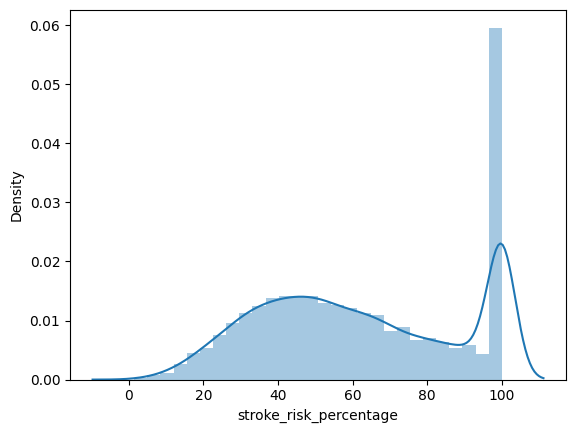

In [28]:
sns.distplot(data['stroke_risk_percentage'])

In [29]:
skewness = data['stroke_risk_percentage'].skew()

print(f"Skewness: {skewness}")
if skewness > 0:
    print("The data is right-skewed (positively skewed).")
elif skewness < 0:
    print("The data is left-skewed (negatively skewed).")
else:
    print("The data is symmetrical.")


Skewness: 0.07700100053563312
The data is right-skewed (positively skewed).


In [30]:
# List of all your feature columns
features = [
    'gender', 'chest_pain', 'high_blood_pressure', 'irregular_heartbeat',
    'shortness_of_breath', 'fatigue_weakness', 'dizziness', 'swelling_edema',
    'neck_jaw_pain', 'excessive_sweating', 'persistent_cough', 'nausea_vomiting',
    'chest_discomfort', 'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom','at_risk'
]

# Loop for pie charts (binary features)
for feature in features:
    fig = px.pie(data, names=feature, title=f'{feature} Distribution')
    fig.show()


In [31]:
fig = px.histogram(data,
                   x="gender",
                   color="at_risk",
                   title='Distribution of Gender by Risk Status',
                   barmode='group',
                   text_auto=True)
fig.show()

In [32]:
fig = px.histogram(data,
                   x="stroke_risk_percentage", #topic
                   color="at_risk",#value
                   title='Distribution of percentage by Risk Status',
                   barmode='group',# group stroke_risk_percentage for risk result 0 -1
                   text_auto=True)
fig.show()

In [33]:
fig = px.box(data, y='age', title='Box Plot of Age')
fig.show()

In [34]:
fig = px.box(data, y='stroke_risk_percentage', title='Box Plot of stroke_risk_percentage')
fig.show()

In [35]:
# Medical age groups
bins = [0, 18, 35, 50, 65, 120]
labels = ['0-18', '18-35', '36-50', '51-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

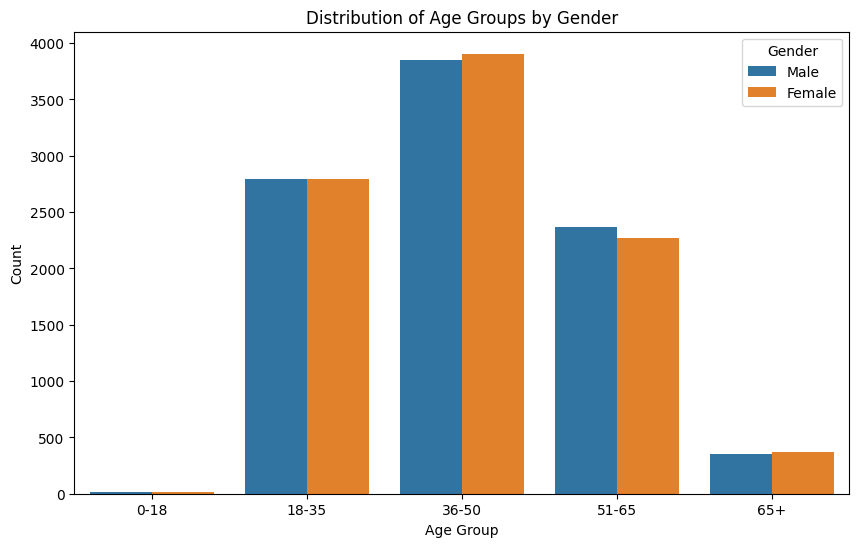

In [36]:


# Option 2: With hue (if you have another categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='gender')
plt.title('Distribution of Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


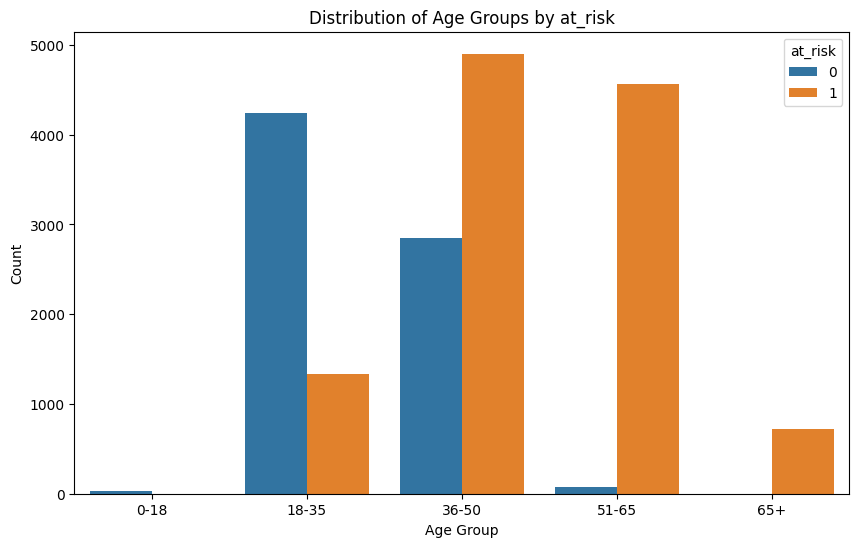

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='at_risk')
plt.title('Distribution of Age Groups by at_risk')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='at_risk')
plt.show()


# **4. Feature Engineering**
Encoding categorical variables (Gender) into numeric formats suitable for machine learning models.

In [38]:
data['gender'] = data['gender'].map({"Male": 0, "Female": 1})

In [39]:
data.head(2)

age  gender  chest_pain  high_blood_pressure  irregular_heartbeat  \
0   22       0           1                    0                    0   
1   52       0           0                    1                    1   

   shortness_of_breath  fatigue_weakness  dizziness  swelling_edema  \
0                    0                 0          0               0   
1                    0                 0          0               0   

   neck_jaw_pain  excessive_sweating  persistent_cough  nausea_vomiting  \
0              0                   0                 1                0   
1              0                   0                 0                0   

   chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  \
0                 0                0                    0             0   
1                 0                1                    1             0   

   stroke_risk_percentage  at_risk age_group  
0                    33.3        0     18-35  
1                   100.0        1     51-65

# **5. Feature Selection**
## **Correlation Matrix**
Analyzing the correlation between features to identify relationships and potential multicollinearity.

In [40]:
data.corr(numeric_only=True)

age    gender  chest_pain  high_blood_pressure  \
age                     1.000000 -0.008731    0.081320             0.169406   
gender                 -0.008731  1.000000   -0.006707            -0.004484   
chest_pain              0.081320 -0.006707    1.000000             0.003434   
high_blood_pressure     0.169406 -0.004484    0.003434             1.000000   
irregular_heartbeat     0.108315 -0.009660   -0.008081             0.018553   
shortness_of_breath     0.066728 -0.008111   -0.013342             0.009669   
fatigue_weakness        0.071479  0.006675   -0.019636             0.002859   
dizziness               0.067604  0.001415   -0.006700             0.002223   
swelling_edema          0.080196  0.003407   -0.021672             0.009729   
neck_jaw_pain           0.108425  0.008393   -0.014090             0.008457   
excessive_sweating      0.024827  0.009437   -0.028419            -0.018321   
persistent_cough        0.075872 -0.002596   -0.016629             0.004566   
nausea_vomiting         0.033184 -0.011919   -0.032564            -0.026021   
chest_discomfort        0.083696 -0.003206   -0.014066             0.003256   
cold_hands_feet         0.069648  0.000220   -0.012688             0.004787   
snoring_sleep_apnea     0.105728  0.001984   -0.009243             0.013531   
anxiety_doom            0.029158  0.010498   -0.019338            -0.014850   
stroke_risk_percentage  0.809425 -0.113343    0.250715             0.386726   
at_risk                 0.616690 -0.096206    0.223533             0.323013   

                        irregular_heartbeat  shortness_of_breath  \
age                                0.108315             0.066728   
gender                            -0.009660            -0.008111   
chest_pain                        -0.008081            -0.013342   
high_blood_pressure                0.018553             0.009669   
irregular_heartbeat                1.000000            -0.016634   
shortness_of_breath               -0.016634             1.000000   
fatigue_weakness                  -0.008768            -0.008820   
dizziness                         -0.013314            -0.013470   
swelling_edema                    -0.005686            -0.022612   
neck_jaw_pain                     -0.016296            -0.006441   
excessive_sweating                -0.029102            -0.017910   
persistent_cough                  -0.020489            -0.017922   
nausea_vomiting                   -0.023169            -0.022431   
chest_discomfort                  -0.021812            -0.015022   
cold_hands_feet                   -0.016451            -0.000090   
snoring_sleep_apnea                0.001947            -0.016248   
anxiety_doom                      -0.017617            -0.015585   
stroke_risk_percentage             0.189284             0.205157   
at_risk                            0.159728             0.180571   

                        fatigue_weakness  dizziness  swelling_edema  \
age                             0.071479   0.067604        0.080196   
gender                          0.006675   0.001415        0.003407   
chest_pain                     -0.019636  -0.006700       -0.021672   
high_blood_pressure             0.002859   0.002223        0.009729   
irregular_heartbeat            -0.008768  -0.013314       -0.005686   
shortness_of_breath            -0.008820  -0.013470       -0.022612   
fatigue_weakness                1.000000  -0.019642       -0.012800   
dizziness                      -0.019642   1.000000       -0.015409   
swelling_edema                 -0.012800  -0.015409        1.000000   
neck_jaw_pain                  -0.013763  -0.014963       -0.007451   
excessive_sweating             -0.019338  -0.029141       -0.021933   
persistent_cough                0.002176  -0.016828       -0.030950   
nausea_vomiting                -0.009872  -0.024276       -0.020586   
chest_discomfort               -0.008980  -0.026010       -0.019719   
cold_hands_feet       

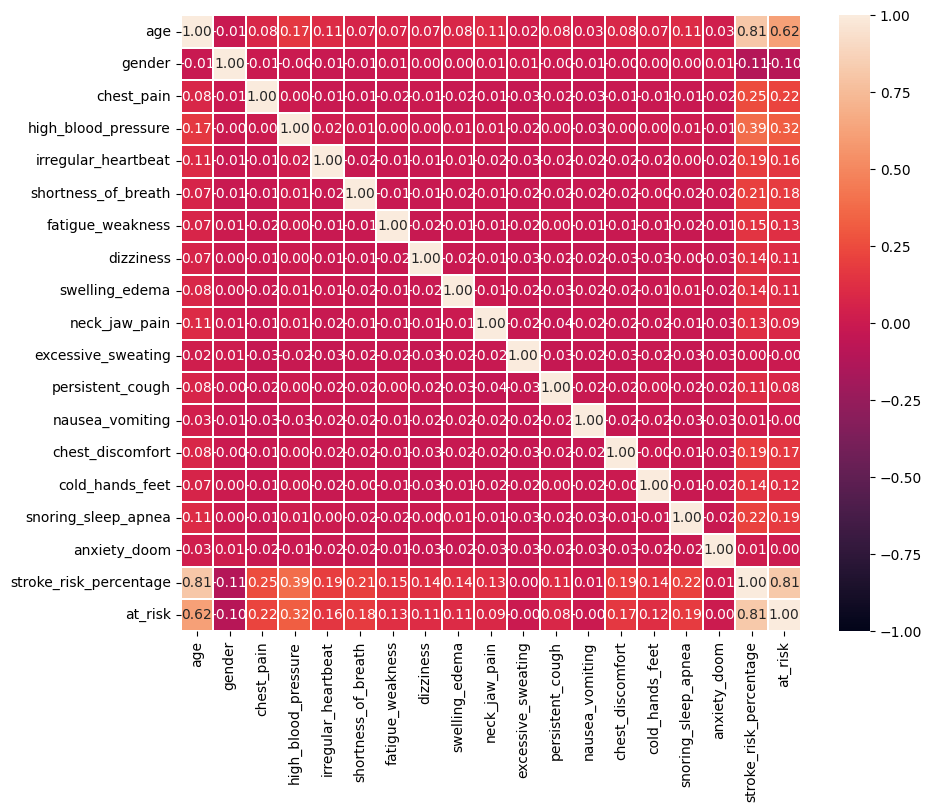

In [41]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f',linewidth=.15,vmin=-1,vmax=1)
plt.show()

In [42]:
# Corr() effect all features on output
data.corr(numeric_only=True)["at_risk"].sort_values(ascending=False)[1:]

stroke_risk_percentage    0.813360
age                       0.616690
high_blood_pressure       0.323013
chest_pain                0.223533
snoring_sleep_apnea       0.186840
shortness_of_breath       0.180571
chest_discomfort          0.167195
irregular_heartbeat       0.159728
fatigue_weakness          0.129763
cold_hands_feet           0.119944
dizziness                 0.113123
swelling_edema            0.105671
neck_jaw_pain             0.088497
persistent_cough          0.079167
anxiety_doom              0.002815
excessive_sweating       -0.001852
nausea_vomiting          -0.003161
gender                   -0.096206
Name: at_risk, dtype: float64

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [45]:
X = data.drop(['at_risk','age_group'], axis=1).copy()
y = data['at_risk']

In [46]:
model=RandomForestClassifier(random_state=42)
rfe=RFE(estimator=model, n_features_to_select=16)
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=16)

In [47]:
selected_features=X.columns[rfe.support_]# support boolean feature 0,1
selected_features

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'persistent_cough',
       'chest_discomfort', 'cold_hands_feet', 'snoring_sleep_apnea',
       'anxiety_doom', 'stroke_risk_percentage'],
      dtype='object')

In [48]:
data = data.drop(['excessive_sweating', 'nausea_vomiting'], axis=1)

# **6. Data Preprocessing**
Splitting the data into training and testing sets, followed by Standard Scaling to normalize feature distributions.

In [49]:
X = data.drop(['at_risk','stroke_risk_percentage','age_group'], axis=1)
y = data['at_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 13104
Test size: 5617


In [51]:
X_train.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'persistent_cough',
       'chest_discomfort', 'cold_hands_feet', 'snoring_sleep_apnea',
       'anxiety_doom'],
      dtype='object')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
scaler.fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

# **7. Machine Learning Models**
Training and evaluating various classification models. For each model, we calculate:
* **Accuracy**
* **Confusion Matrix**
* **Classification Report**
* **ROC AUC Score**

## **LogisticRegression**

In [54]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

Accuracy: 96.3%
[[2081  101]
 [ 105 3330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.96      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.96      0.96      0.96      5617

ROC AUC: 0.9956995638524543


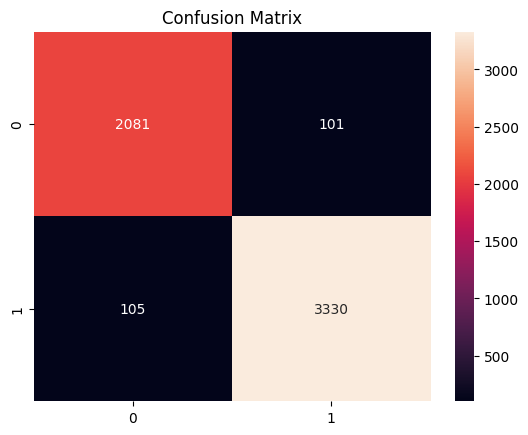

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

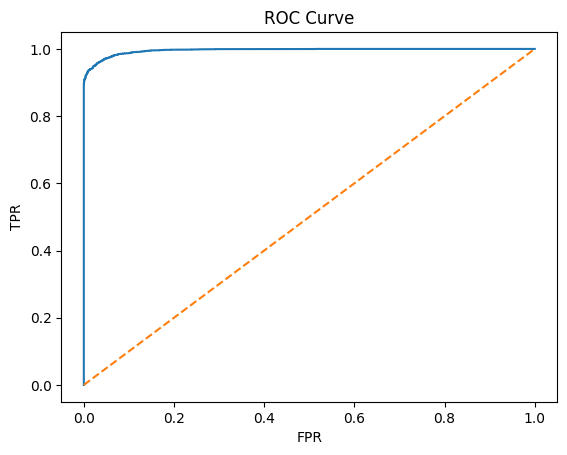

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

## **SVM**

In [57]:
kernels = ['linear']
for kernel in kernels:
    model = SVC(random_state=42, probability=True, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel={kernel:8} Accuracy: {accuracy:.1%}")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Kernel=linear   Accuracy: 96.3%
[[2089   93]
 [ 113 3322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.96      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.96      0.96      0.96      5617

ROC AUC: 0.996


In [58]:
y_test.head(7)

23389    0
34588    1
29876    1
13915    1
33311    1
16057    0
371      1
Name: at_risk, dtype: int64

In [59]:
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'Right' if actual==pred else 'False'}")

Sample 0: Actual=0, Predicted=1, False
Sample 1: Actual=1, Predicted=1, Right
Sample 2: Actual=1, Predicted=0, False
Sample 3: Actual=1, Predicted=1, Right
Sample 4: Actual=1, Predicted=1, Right
Sample 5: Actual=0, Predicted=0, Right
Sample 6: Actual=1, Predicted=1, Right
Sample 7: Actual=0, Predicted=0, Right
Sample 8: Actual=0, Predicted=0, Right
Sample 9: Actual=1, Predicted=1, Right
Sample 10: Actual=1, Predicted=1, Right
Sample 11: Actual=0, Predicted=0, Right
Sample 12: Actual=1, Predicted=1, Right
Sample 13: Actual=1, Predicted=1, Right
Sample 14: Actual=0, Predicted=0, Right
Sample 15: Actual=1, Predicted=1, Right
Sample 16: Actual=1, Predicted=1, Right
Sample 17: Actual=1, Predicted=1, Right
Sample 18: Actual=0, Predicted=0, Right
Sample 19: Actual=1, Predicted=1, Right
Sample 20: Actual=1, Predicted=1, Right
Sample 21: Actual=1, Predicted=1, Right
Sample 22: Actual=1, Predicted=1, Right
Sample 23: Actual=1, Predicted=1, Right
Sample 24: Actual=1, Predicted=1, Right
Sample 25:

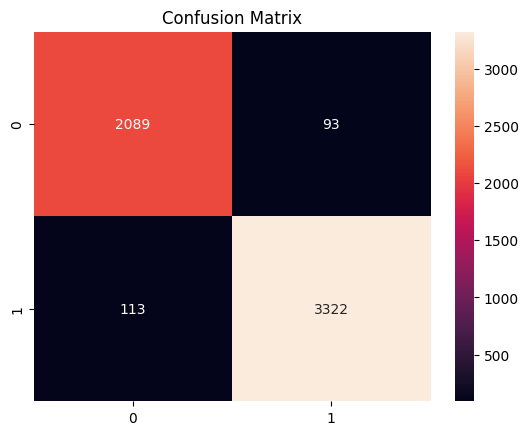

In [60]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

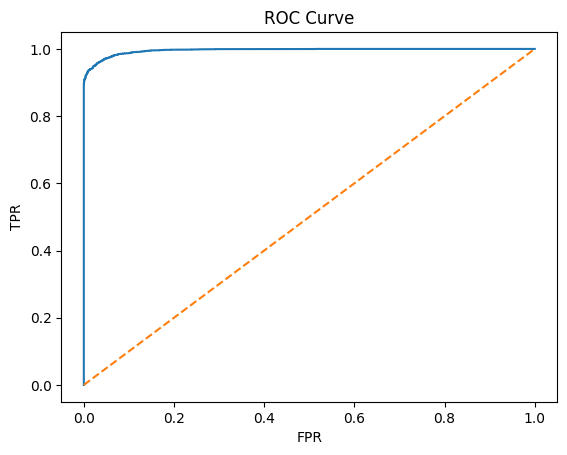

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

## **AdaBoost**

In [62]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Accuracy: 91.7%
[[1934  248]
 [ 217 3218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2182
           1       0.93      0.94      0.93      3435

    accuracy                           0.92      5617
   macro avg       0.91      0.91      0.91      5617
weighted avg       0.92      0.92      0.92      5617

ROC AUC: 0.978


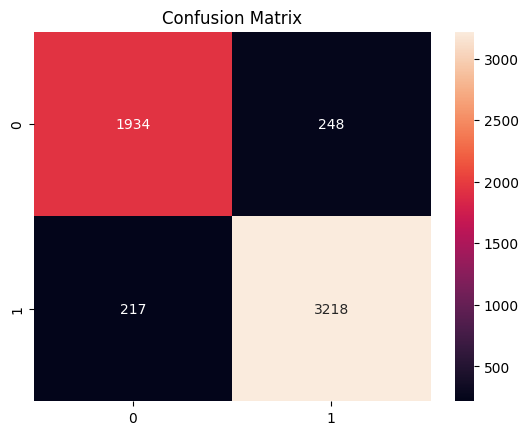

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

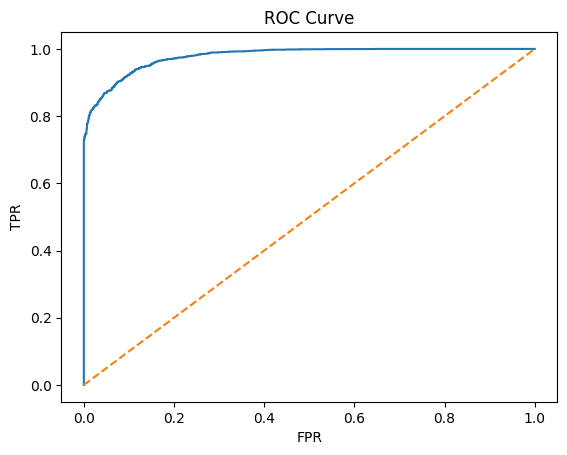

In [64]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [65]:
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'Right' if actual==pred else 'False'}")

Sample 0: Actual=0, Predicted=1, False
Sample 1: Actual=1, Predicted=1, Right
Sample 2: Actual=1, Predicted=0, False
Sample 3: Actual=1, Predicted=1, Right
Sample 4: Actual=1, Predicted=1, Right
Sample 5: Actual=0, Predicted=0, Right
Sample 6: Actual=1, Predicted=1, Right
Sample 7: Actual=0, Predicted=0, Right
Sample 8: Actual=0, Predicted=0, Right
Sample 9: Actual=1, Predicted=1, Right
Sample 10: Actual=1, Predicted=1, Right
Sample 11: Actual=0, Predicted=1, False
Sample 12: Actual=1, Predicted=1, Right
Sample 13: Actual=1, Predicted=1, Right
Sample 14: Actual=0, Predicted=0, Right
Sample 15: Actual=1, Predicted=1, Right
Sample 16: Actual=1, Predicted=1, Right
Sample 17: Actual=1, Predicted=1, Right
Sample 18: Actual=0, Predicted=0, Right
Sample 19: Actual=1, Predicted=1, Right
Sample 20: Actual=1, Predicted=1, Right
Sample 21: Actual=1, Predicted=0, False
Sample 22: Actual=1, Predicted=1, Right
Sample 23: Actual=1, Predicted=1, Right
Sample 24: Actual=1, Predicted=1, Right
Sample 25:

## **RandomForest**

In [66]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Accuracy: 93.8%
[[2059  123]
 [ 226 3209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2182
           1       0.96      0.93      0.95      3435

    accuracy                           0.94      5617
   macro avg       0.93      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617

ROC AUC: 0.987


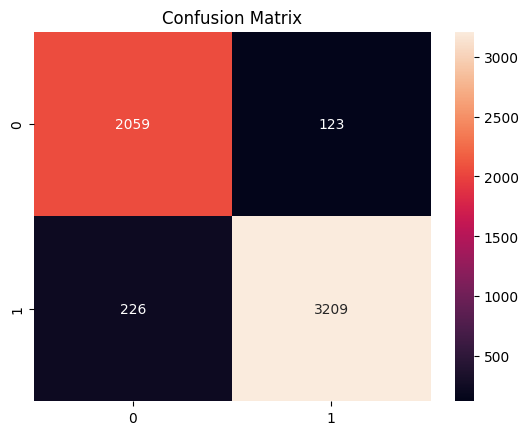

In [67]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

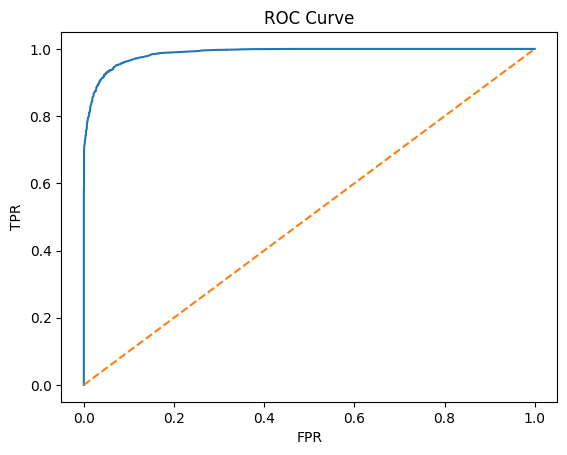

In [68]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [69]:
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'Right' if actual==pred else 'False'}")

Sample 0: Actual=0, Predicted=1, False
Sample 1: Actual=1, Predicted=1, Right
Sample 2: Actual=1, Predicted=1, Right
Sample 3: Actual=1, Predicted=1, Right
Sample 4: Actual=1, Predicted=1, Right
Sample 5: Actual=0, Predicted=0, Right
Sample 6: Actual=1, Predicted=1, Right
Sample 7: Actual=0, Predicted=0, Right
Sample 8: Actual=0, Predicted=0, Right
Sample 9: Actual=1, Predicted=1, Right
Sample 10: Actual=1, Predicted=1, Right
Sample 11: Actual=0, Predicted=0, Right
Sample 12: Actual=1, Predicted=1, Right
Sample 13: Actual=1, Predicted=1, Right
Sample 14: Actual=0, Predicted=0, Right
Sample 15: Actual=1, Predicted=1, Right
Sample 16: Actual=1, Predicted=1, Right
Sample 17: Actual=1, Predicted=1, Right
Sample 18: Actual=0, Predicted=0, Right
Sample 19: Actual=1, Predicted=1, Right
Sample 20: Actual=1, Predicted=1, Right
Sample 21: Actual=1, Predicted=0, False
Sample 22: Actual=1, Predicted=1, Right
Sample 23: Actual=1, Predicted=1, Right
Sample 24: Actual=1, Predicted=1, Right
Sample 25:

## **GradientBoosting**

In [70]:
model =GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.1%}")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, y_proba)))

Accuracy: 94.4%
[[2024  158]
 [ 155 3280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2182
           1       0.95      0.95      0.95      3435

    accuracy                           0.94      5617
   macro avg       0.94      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617

ROC AUC: 0.987


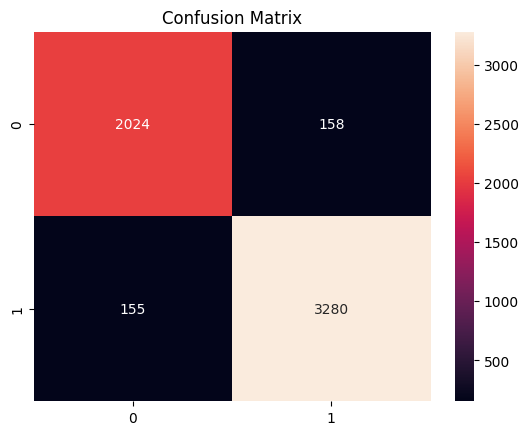

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

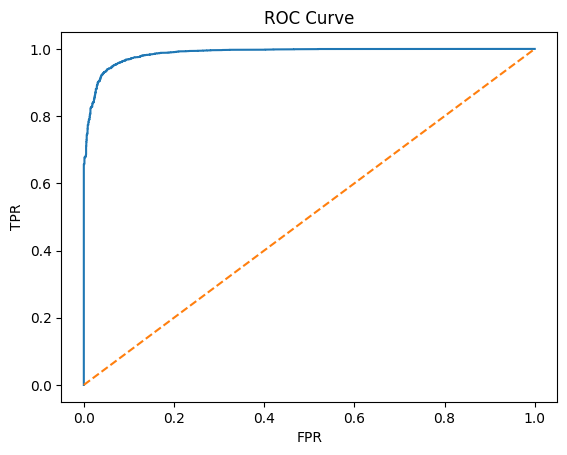

In [72]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [73]:
for i in range(30):
    actual = y_test.iloc[i]; pred = model.predict(X_test.iloc[i:i+1])[0]
    print(f"Sample {i}: Actual={actual}, Predicted={pred}, {'✓' if actual==pred else '✗'}")

Sample 0: Actual=0, Predicted=1, ✗
Sample 1: Actual=1, Predicted=1, ✓
Sample 2: Actual=1, Predicted=1, ✓
Sample 3: Actual=1, Predicted=1, ✓
Sample 4: Actual=1, Predicted=1, ✓
Sample 5: Actual=0, Predicted=0, ✓
Sample 6: Actual=1, Predicted=1, ✓
Sample 7: Actual=0, Predicted=0, ✓
Sample 8: Actual=0, Predicted=0, ✓
Sample 9: Actual=1, Predicted=1, ✓
Sample 10: Actual=1, Predicted=1, ✓
Sample 11: Actual=0, Predicted=1, ✗
Sample 12: Actual=1, Predicted=1, ✓
Sample 13: Actual=1, Predicted=1, ✓
Sample 14: Actual=0, Predicted=0, ✓
Sample 15: Actual=1, Predicted=1, ✓
Sample 16: Actual=1, Predicted=1, ✓
Sample 17: Actual=1, Predicted=1, ✓
Sample 18: Actual=0, Predicted=0, ✓
Sample 19: Actual=1, Predicted=1, ✓
Sample 20: Actual=1, Predicted=1, ✓
Sample 21: Actual=1, Predicted=0, ✗
Sample 22: Actual=1, Predicted=1, ✓
Sample 23: Actual=1, Predicted=1, ✓
Sample 24: Actual=1, Predicted=1, ✓
Sample 25: Actual=0, Predicted=0, ✓
Sample 26: Actual=1, Predicted=1, ✓
Sample 27: Actual=1, Predicted=1, ✓
Sa

# **8. Comprehensive Model Comparison**
Defining a unified evaluation loop to train and test multiple models (Logistic Regression, Random Forest, SVM, GBM, AdaBoost) sequentially and compare their metrics side-by-side.

In [74]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM (linear)': SVC(kernel='linear', probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

**Evaluation Function**

In [75]:
def train_evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n{'='*45}")
    print(f"Model: {name}")
    print(f"{'='*45}")

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy  : {accuracy:.1%}")
    print(f"Error Rate: {error_rate:.1%}")
    print(f"ROC AUC   : {roc_auc:.3f}\n")

    # Regression-style Errors
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5


    print("Error Metrics:")
    print(f"MAE  : {mae:.3f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()


**Run all models**


Model: Logistic Regression
Accuracy  : 96.3%
Error Rate: 3.7%
ROC AUC   : 0.996

Error Metrics:
MAE  : 0.037
MSE  : 0.037
RMSE : 0.192
Confusion Matrix:
[[2081  101]
 [ 105 3330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.96      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.96      0.96      0.96      5617



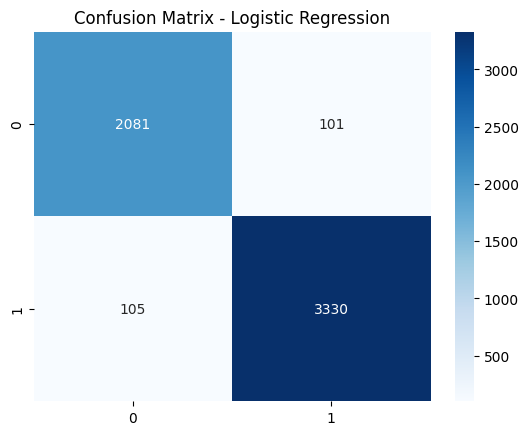

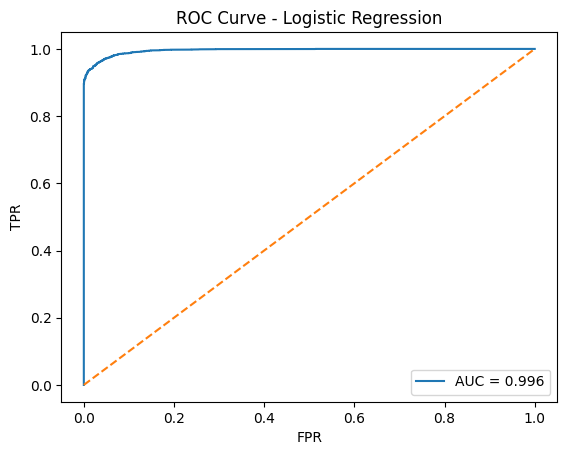


Model: Random Forest
Accuracy  : 93.8%
Error Rate: 6.2%
ROC AUC   : 0.987

Error Metrics:
MAE  : 0.062
MSE  : 0.062
RMSE : 0.249
Confusion Matrix:
[[2059  123]
 [ 226 3209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2182
           1       0.96      0.93      0.95      3435

    accuracy                           0.94      5617
   macro avg       0.93      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617



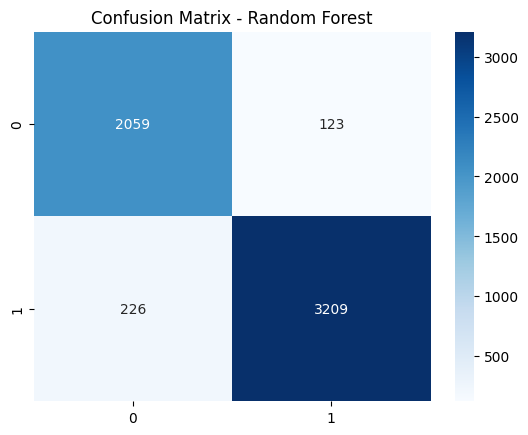

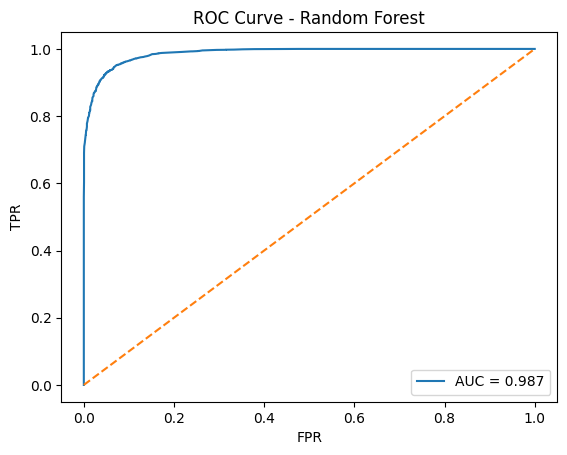


Model: Gradient Boosting
Accuracy  : 94.4%
Error Rate: 5.6%
ROC AUC   : 0.987

Error Metrics:
MAE  : 0.056
MSE  : 0.056
RMSE : 0.236
Confusion Matrix:
[[2024  158]
 [ 155 3280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2182
           1       0.95      0.95      0.95      3435

    accuracy                           0.94      5617
   macro avg       0.94      0.94      0.94      5617
weighted avg       0.94      0.94      0.94      5617



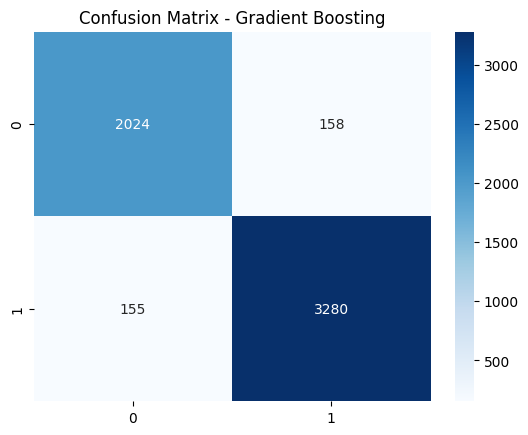

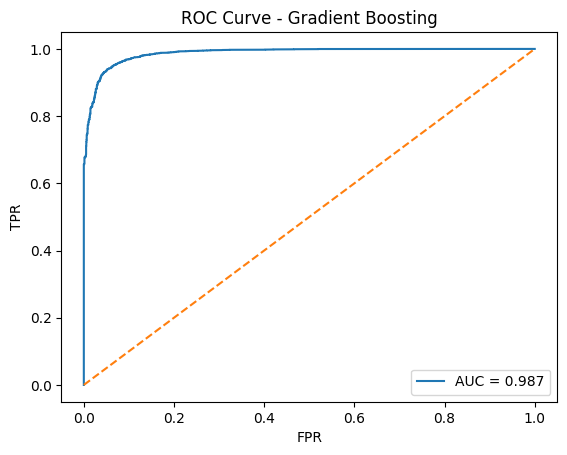


Model: SVM (linear)
Accuracy  : 96.3%
Error Rate: 3.7%
ROC AUC   : 0.996

Error Metrics:
MAE  : 0.037
MSE  : 0.037
RMSE : 0.192
Confusion Matrix:
[[2089   93]
 [ 113 3322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2182
           1       0.97      0.97      0.97      3435

    accuracy                           0.96      5617
   macro avg       0.96      0.96      0.96      5617
weighted avg       0.96      0.96      0.96      5617



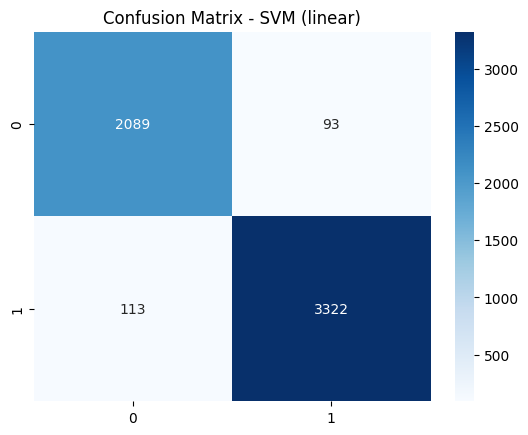

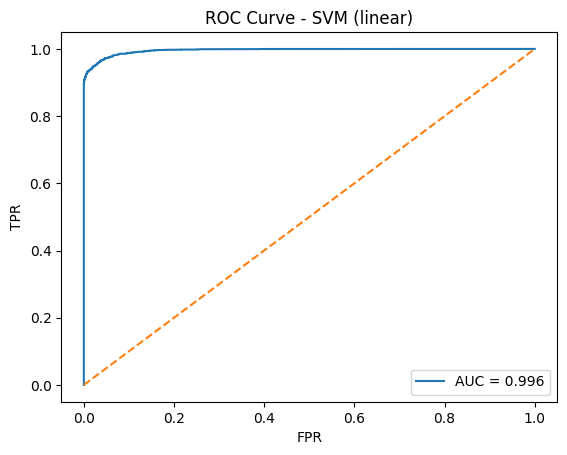


Model: AdaBoost
Accuracy  : 91.7%
Error Rate: 8.3%
ROC AUC   : 0.978

Error Metrics:
MAE  : 0.083
MSE  : 0.083
RMSE : 0.288
Confusion Matrix:
[[1934  248]
 [ 217 3218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2182
           1       0.93      0.94      0.93      3435

    accuracy                           0.92      5617
   macro avg       0.91      0.91      0.91      5617
weighted avg       0.92      0.92      0.92      5617



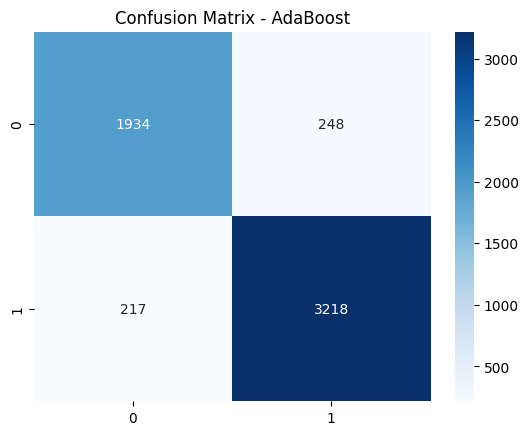

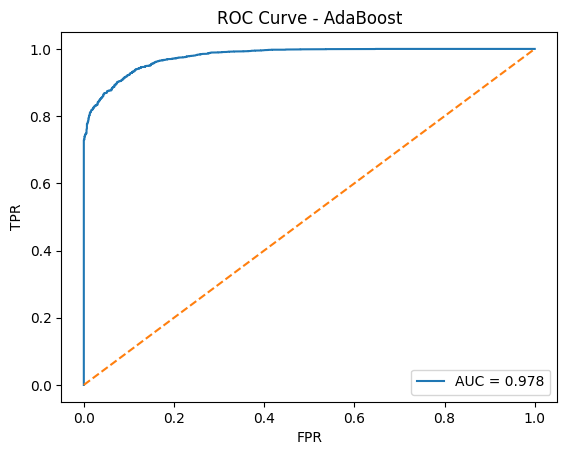

In [76]:
for name, model in models.items():
    train_evaluate_model(name, model, X_train, X_test, y_train, y_test)

# **9. Deep Learning Approach (ANN)**
Building a standard Artificial Neural Network using TensorFlow/Keras to see if a deep learning approach outperforms traditional classifiers.

**Build the Neural Network**

In [78]:
model = keras.Sequential([
    keras.layers.Input(shape=(15,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

**Compile the Model**

In [79]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Train the Model**

In [80]:
history = model.fit(
    X_train, y_train,
    epochs=12,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6230 - loss: 0.6051 - val_accuracy: 0.8077 - val_loss: 0.3863
Epoch 2/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8329 - loss: 0.3709 - val_accuracy: 0.9225 - val_loss: 0.2451
Epoch 3/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9070 - loss: 0.2434 - val_accuracy: 0.9546 - val_loss: 0.1696
Epoch 4/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9447 - loss: 0.1691 - val_accuracy: 0.9603 - val_loss: 0.1307
Epoch 5/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9463 - loss: 0.1462 - val_accuracy: 0.9363 - val_loss: 0.1534
Epoch 6/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9442 - loss: 0.1329 - val_accuracy: 0.9622 - val_loss: 0.1075
Epoch 7/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9494 - loss: 0.1216 - val_accuracy: 0.9634 - val_loss: 0.1005
Epoch 8/12
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9539 - loss: 0.1107 - val_accuracy: 0.

In [81]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1085
Test Loss: 0.1052
Test Accuracy: 0.9512


## **Training History Visualization**
Plotting the Accuracy and Loss curves over epochs to check for overfitting or underfitting.

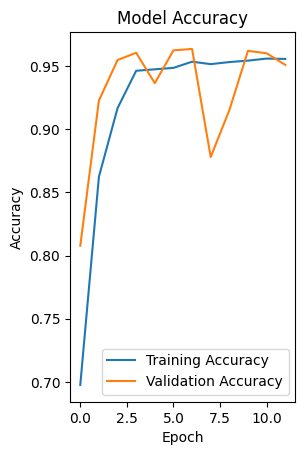

In [82]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

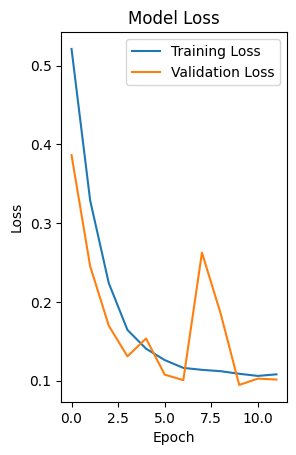

In [83]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()